In [1]:
import pandas as pd 
import os
import matplotlib.pyplot as plt 


In [2]:
df = pd.read_csv("dataset_synop.csv", encoding = "ISO-8859-1", delimiter = ";")
df.head()

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\1105157399.py:1: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dataset_synop.csv", encoding = "ISO-8859-1", delimiter = ";")


WMO Station ID                       Date  Sea level pressure  \
0            7761  2010-01-05T20:00:00+02:00             99490.0   
1            7790  2010-03-01T17:00:00+02:00            101130.0   
2            7790  2010-02-27T23:00:00+02:00            100990.0   
3            7790  2010-02-28T11:00:00+02:00            100300.0   
4            7790  2010-02-25T17:00:00+02:00            100710.0   

   3-hour pressure variation  Barometric trend type  \
0                     -100.0                    7.0   
1                      -50.0                    5.0   
2                     -240.0                    6.0   
3                       70.0                    3.0   
4                      -80.0                    7.0   

   10-min mean wind direction  10-min mean wind speed  Temperature  Dew point  \
0                        60.0                     1.5       285.05     284.15   
1                       330.0                     3.6       285.65     284.25   
2                       150.0                     1.5       282.45     280.75   
3                       230.0                     2.1       288.95     284.15   
4                        30.0                     1.5       288.55     282.85   

   Humidity  ...  Altitude  municipalities (name)  municipalities (code)  \
0      94.0  ...         5                Ajaccio                  2a004   
1      91.0  ...        10               Lucciana                  2b148   
2      89.0  ...        10               Lucciana                  2b148   
3      73.0  ...        10               Lucciana                  2b148   
4      69.0  ...        10               Lucciana                  2b148   

           EPCI (name)  EPCI (code)  department (name)  department (code)  \
0  CA du Pays Ajaccien    242010056       Corse-du-Sud                 2a   
1    CC de Marana-Golo    200036499        Haute-Corse                 2b   
2    CC de Marana-Golo    200036499        Haute-Corse                 2b   
3    CC de Marana-Golo    200036499        Haute-Corse                 2b   
4    CC de Marana-Golo    200036499        Haute-Corse                 2b   

   region (name)  region (code)  month_of_the_yearx  
0          Corse             94                   1  
1          Corse             94                   3  
2          Corse             94                   2  
3          Corse             94                   2  
4          Corse             94                   2  

[5 rows x 82 columns]

In [3]:
for column in df.columns:
    print(column, df[column].nunique())

WMO Station ID 2
Date 42632
Sea level pressure 556
3-hour pressure variation 125
Barometric trend type 9
10-min mean wind direction 37
10-min mean wind speed 176
Temperature 393
Dew point 377
Humidity 93
Horizontal visibility 5803
Present weather 60
Past weather 1 9
Past weather 2 9
Total cloud cover 10
Lower-level cloud cover 10
Lower-level cloud base height 119
Lower-level cloud type 11
Middle-level cloud type 11
Upper-level cloud type 11
Station pressure 552
Barometric level 0
Geopotential 0
24-hour pressure variation 446
12-hour minimum temperature 308
24-hour minimum temperature 0
12-hour maximum temperature 355
24-hour maximum temperature 0
12-hour minimum ground temperature 349
Measurement method Wet-bulb temperature 0
Wet-bulb temperature 0
Gust over last 10 minutes 278
Gusts over a period 306
Gust measurement period 2
Ground condition 10
Total height of snow, ice, other layer on the ground 19
Height of fresh snow 5
Measurement period of fresh snow 4
Precipitation in the last h

In [4]:
len(df)

85123

In [5]:
print("Station 7790: ", len(df[df["WMO Station ID"] == 7790]))
print("Station 7761: ", len(df[df["WMO Station ID"] == 7761]))

Station 7790:  42545
Station 7761:  42578


In [6]:
from datetime import datetime

def parse_date(date_string):
  # Parse the date string, ignoring the timezone offset
  dt = datetime.strptime(date_string[:19], '%Y-%m-%dT%H:%M:%S')
  return dt

df['Date'] = df['Date'].apply(parse_date)
df.head(10)


WMO Station ID                Date  Sea level pressure  \
0            7761 2010-01-05 20:00:00             99490.0   
1            7790 2010-03-01 17:00:00            101130.0   
2            7790 2010-02-27 23:00:00            100990.0   
3            7790 2010-02-28 11:00:00            100300.0   
4            7790 2010-02-25 17:00:00            100710.0   
5            7790 2010-02-25 23:00:00            100580.0   
6            7761 2010-04-28 03:00:00            102210.0   
7            7790 2010-04-28 09:00:00            102360.0   
8            7790 2010-04-28 15:00:00            102370.0   
9            7761 2010-04-27 03:00:00            101990.0   

   3-hour pressure variation  Barometric trend type  \
0                     -100.0                    7.0   
1                      -50.0                    5.0   
2                     -240.0                    6.0   
3                       70.0                    3.0   
4                      -80.0                    7.0   
5                     -120.0                    7.0   
6                       50.0                    1.0   
7                      100.0                    3.0   
8                      -70.0                    8.0   
9                     -100.0                    8.0   

   10-min mean wind direction  10-min mean wind speed  Temperature  Dew point  \
0                        60.0                     1.5       285.05     284.15   
1                       330.0                     3.6       285.65     284.25   
2                       150.0                     1.5       282.45     280.75   
3                       230.0                     2.1       288.95     284.15   
4                        30.0                     1.5       288.55     282.85   
5                       250.0                     0.5       281.15     280.25   
6                        50.0                     2.6       285.65     284.75   
7                       220.0                     1.0       288.45     285.75   
8                        20.0                     2.6       296.05     284.45   
9                        40.0                     2.6       285.65     284.55   

   Humidity  ...  Altitude  municipalities (name)  municipalities (code)  \
0      94.0  ...         5                Ajaccio                  2a004   
1      91.0  ...        10               Lucciana                  2b148   
2      89.0  ...        10               Lucciana                  2b148   
3      73.0  ...        10               Lucciana                  2b148   
4      69.0  ...        10               Lucciana                  2b148   
5      94.0  ...        10               Lucciana                  2b148   
6      94.0  ...         5                Ajaccio                  2a004   
7      84.0  ...        10               Lucciana                  2b148   
8      48.0  ...        10               Lucciana                  2b148   
9      93.0  ...         5                Ajaccio                  2a004   

           EPCI (name)  EPCI (code)  department (name)  department (code)  \
0  CA du Pays Ajaccien    242010056       Corse-du-Sud                 2a   
1    CC de Marana-Golo    200036499        Haute-Corse                 2b   
2    CC de Marana-Golo    200036499        Haute-Corse                 2b   
3    CC de Marana-Golo    200036499        Haute-Corse                 2b   
4    CC de Marana-Golo    200036499        Haute-Corse                 2b   
5    CC de Marana-Golo    200036499        Haute-Corse                 2b   
6  CA du Pays Ajaccien    242010056       Corse-du-Sud                 2a   
7    CC de Marana-Golo    200036499        Haute-Corse                 2b   
8    CC de Marana-Golo    200036499        Haute-Corse                 2b   
9  CA du Pays Ajaccien    242010056       Corse-du-Sud                 2a   

   region (name)  region (code)  month_of_the_yearx  
0          Corse             94                   1  
1          Corse             94         

In [7]:
print(df[df['WMO Station ID'] == 7761].shape[0])
print(df[df['WMO Station ID'] == 7790].shape[0])

42578
42545


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85123 entries, 0 to 85122
Data columns (total 82 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   WMO Station ID                                        85123 non-null  int64         
 1   Date                                                  85123 non-null  datetime64[ns]
 2   Sea level pressure                                    84847 non-null  float64       
 3   3-hour pressure variation                             85043 non-null  float64       
 4   Barometric trend type                                 85058 non-null  float64       
 5   10-min mean wind direction                            85083 non-null  float64       
 6   10-min mean wind speed                                85087 non-null  float64       
 7   Temperature                                           84878 non-null  float6

In [9]:
before_cols = set(df.columns)  # Store original column names
df = df.dropna(axis=1, how="all")  # Drop null columns
after_cols = set(df.columns)  # Store new column names

dropped_cols = before_cols - after_cols  # Find dropped columns
print("Dropped columns:", dropped_cols)

Dropped columns: {'24-hour minimum temperature (C)', 'Measurement method Wet-bulb temperature', 'Wet-bulb temperature', '24-hour maximum temperature (C)', '24-hour minimum temperature', '24-hour maximum temperature', 'Geopotential', 'Barometric level'}


In [10]:
df_7761 = df[df['WMO Station ID'] == 7761]
df_7790 = df[df['WMO Station ID'] == 7790]

df_7761.reset_index(inplace=True)
df_7790.reset_index(inplace=True)

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


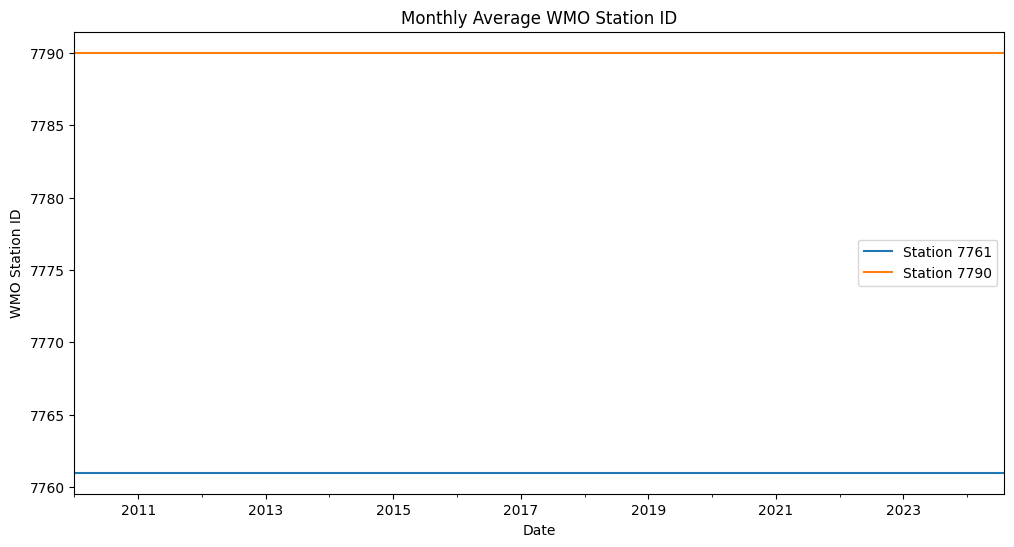

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


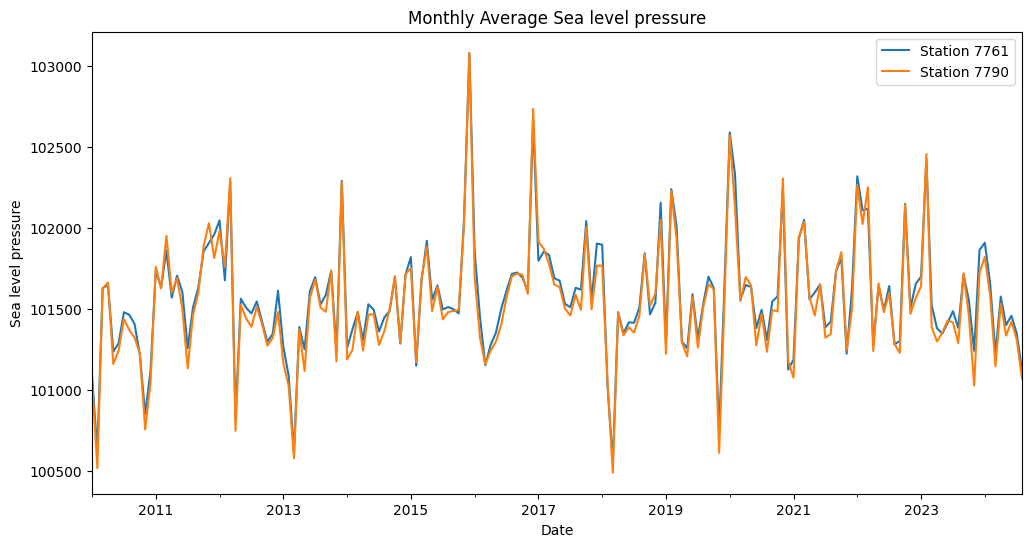

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


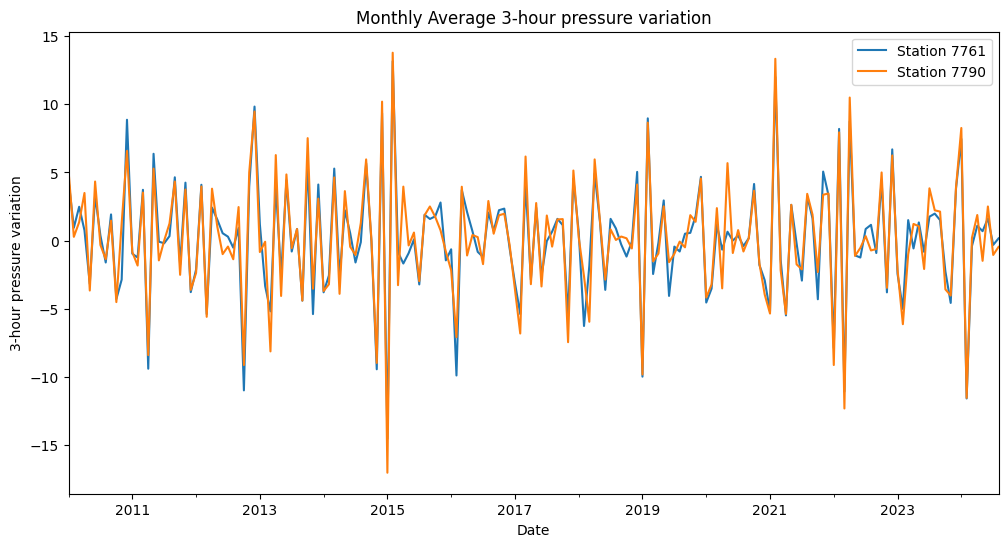

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


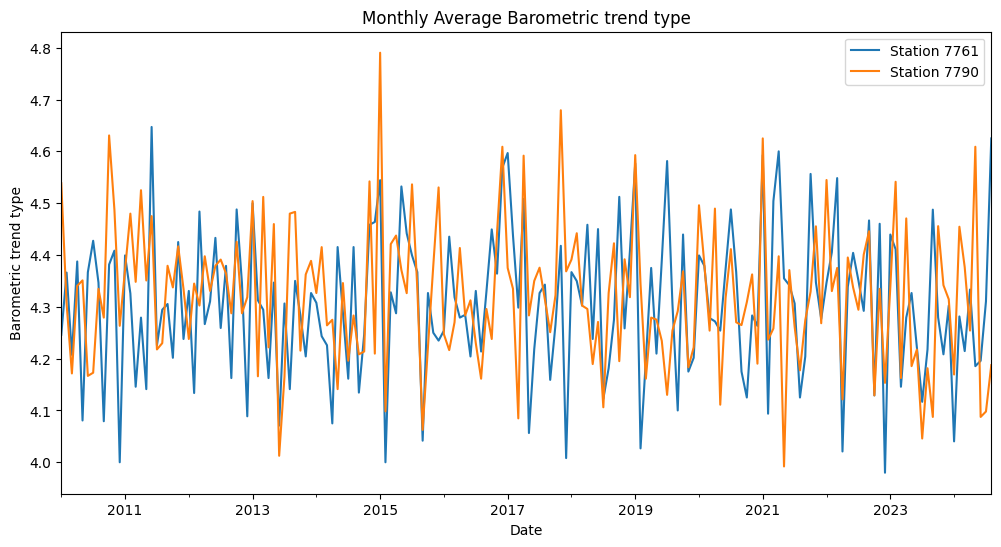

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


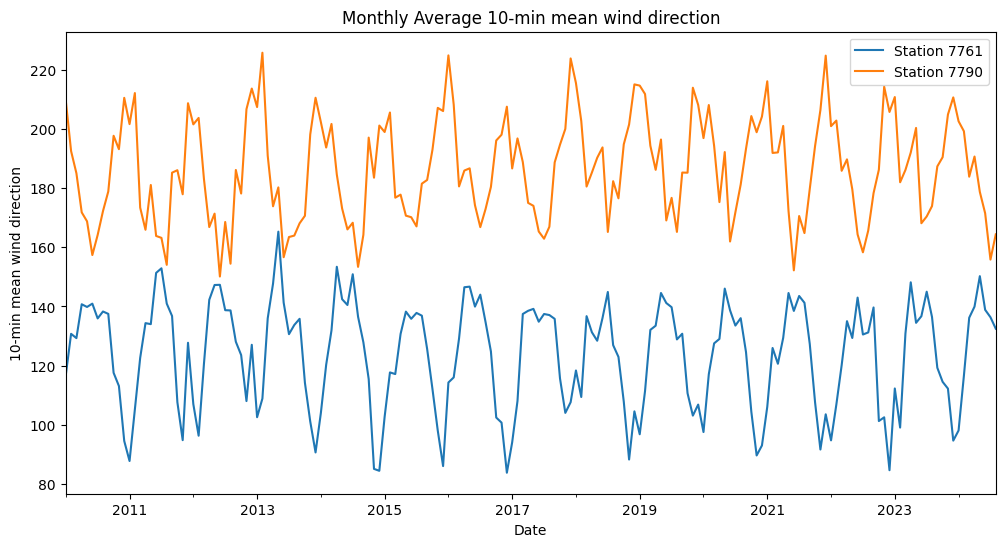

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


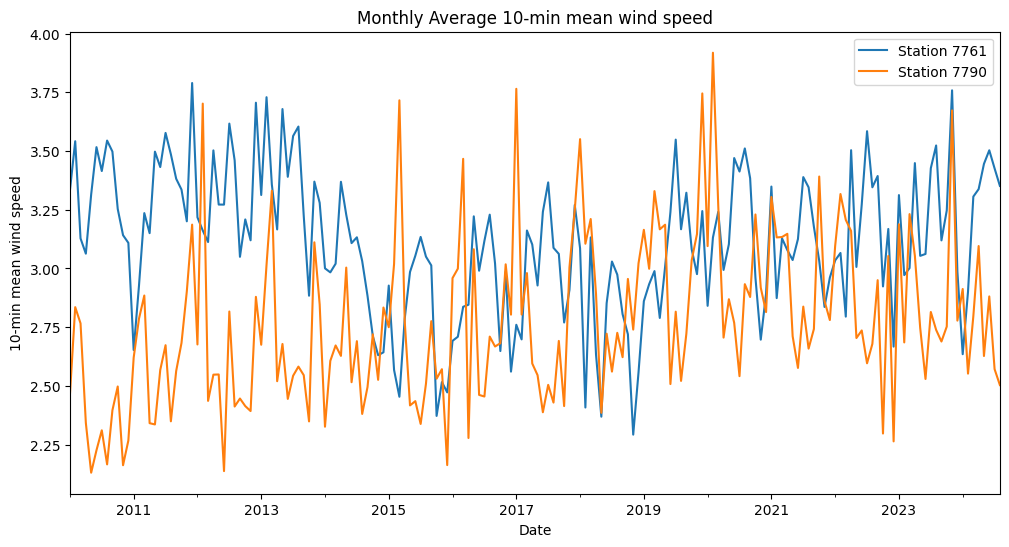

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


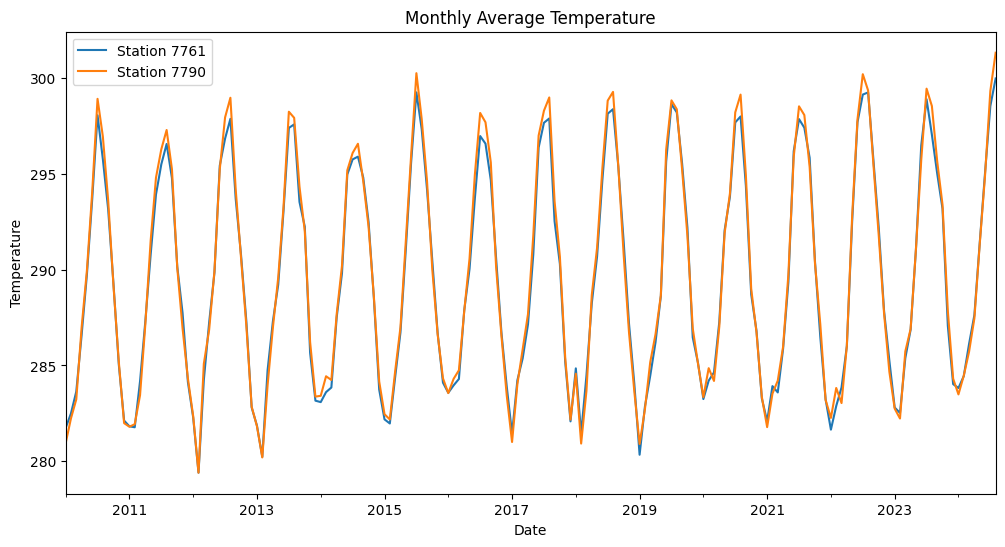

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


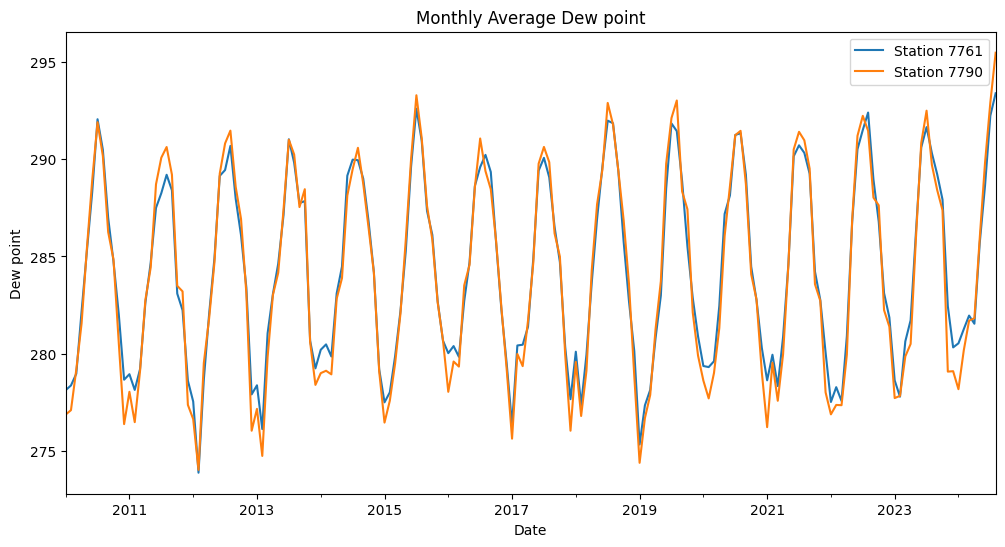

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


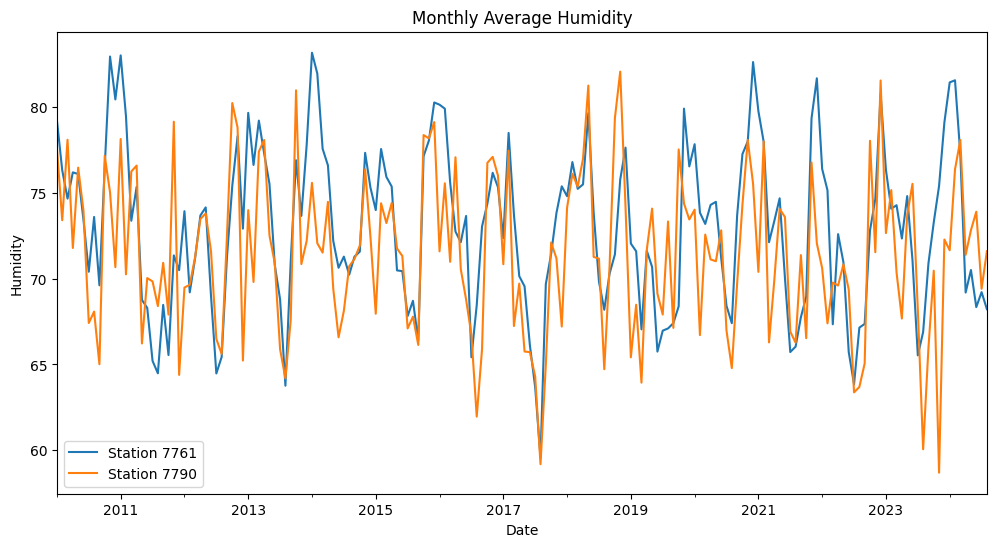

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


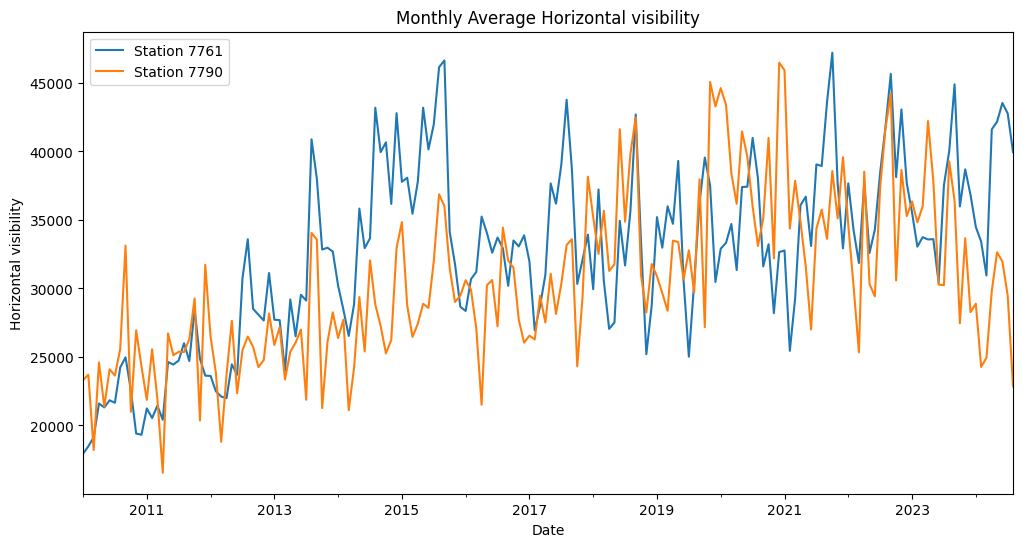

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


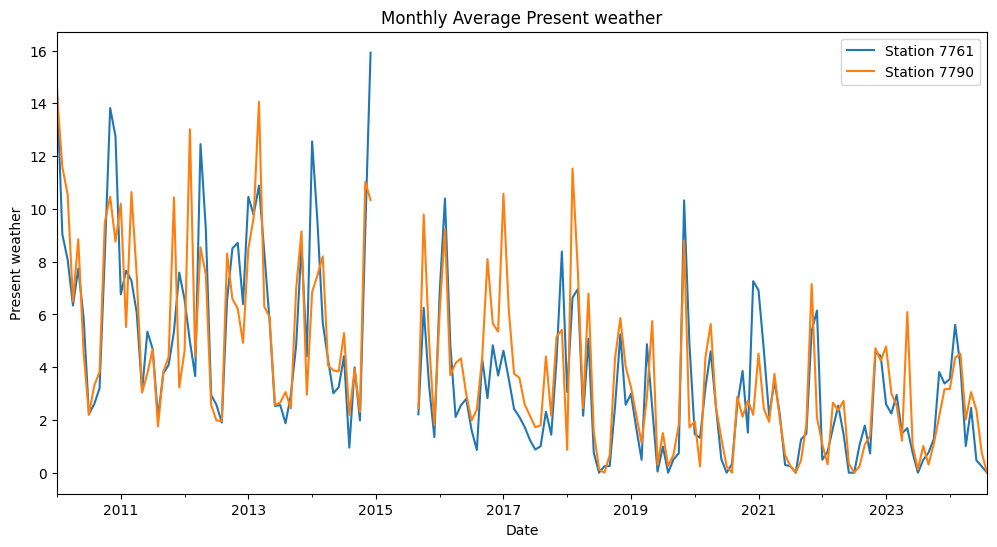

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


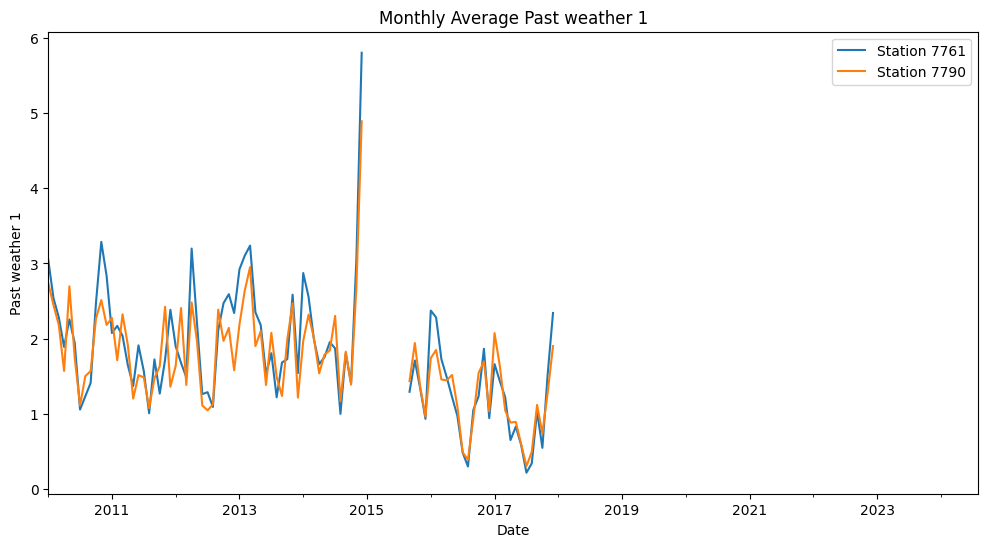

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


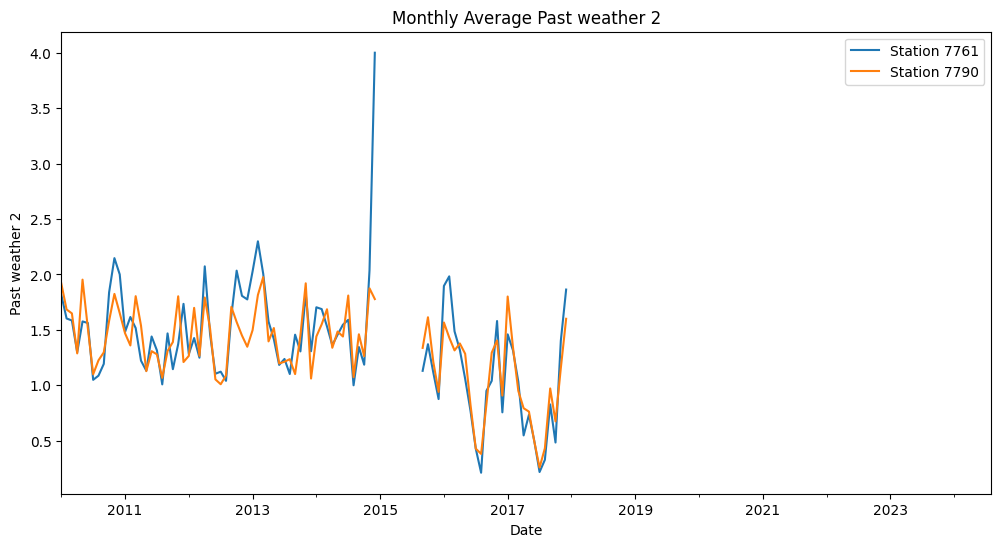

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


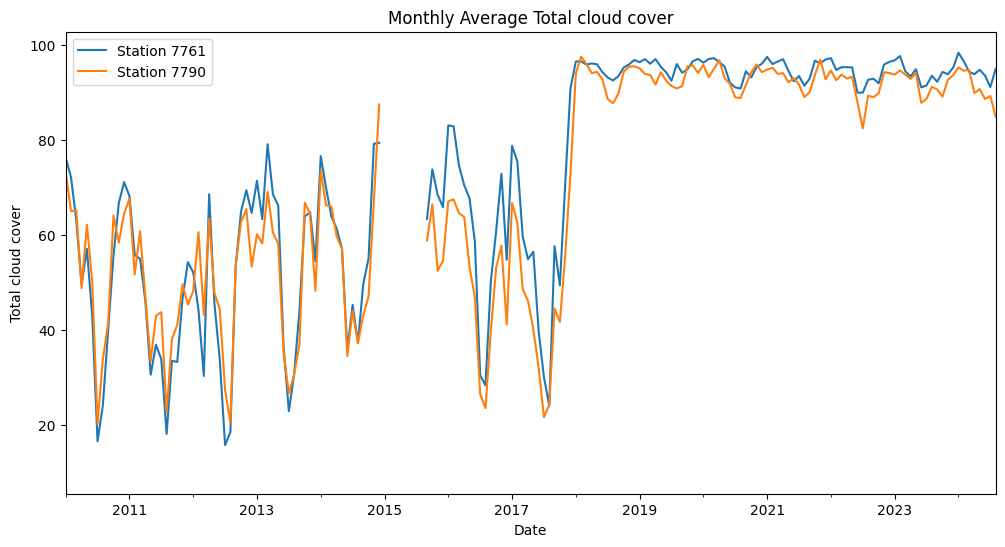

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


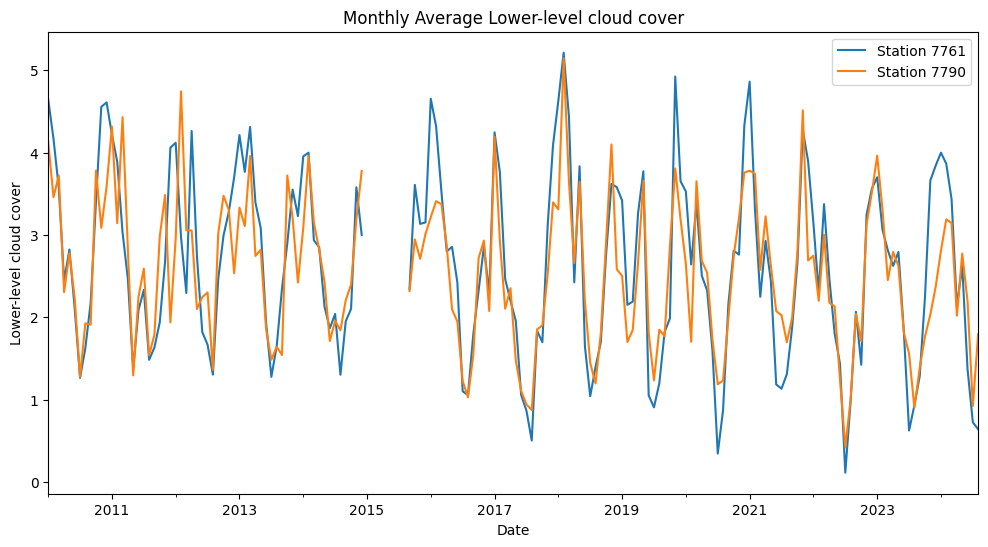

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


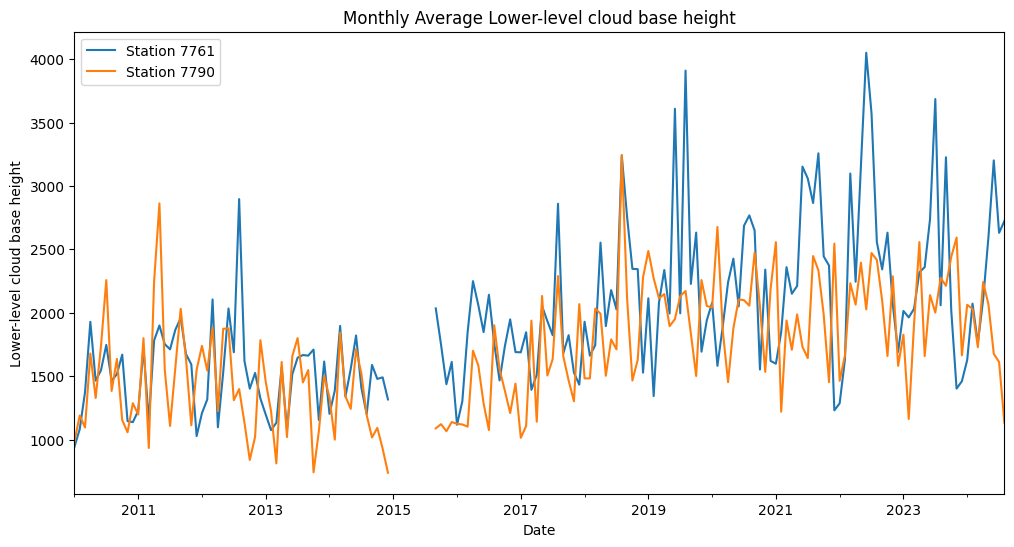

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


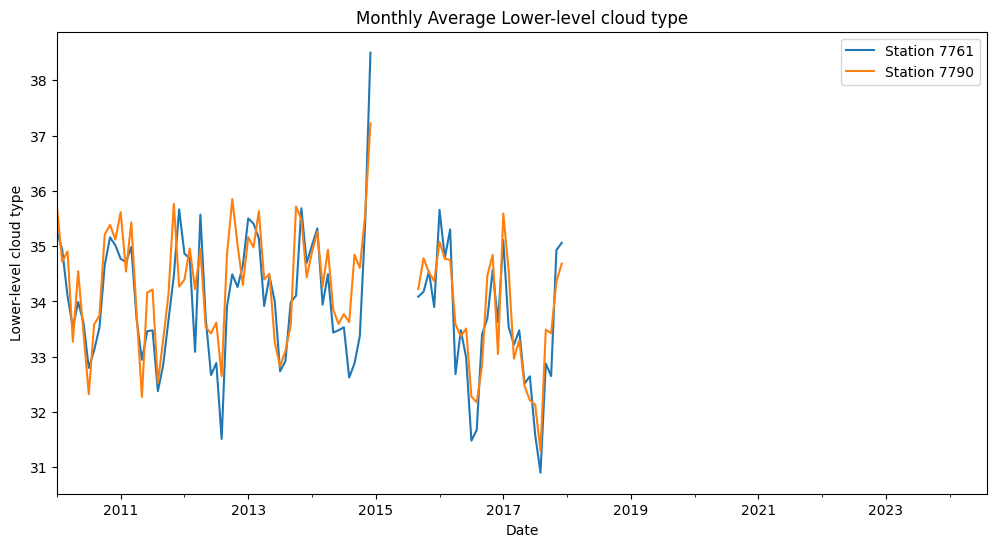

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


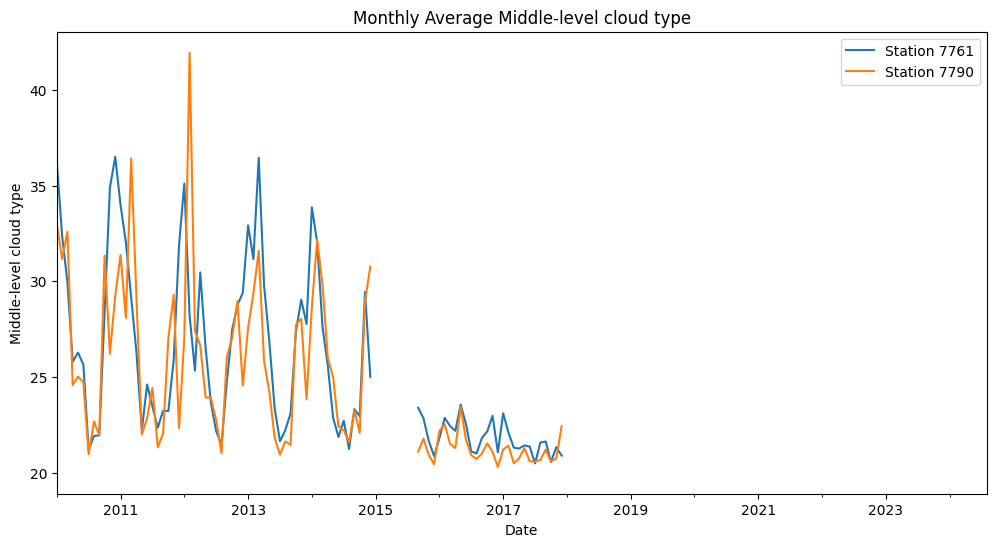

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


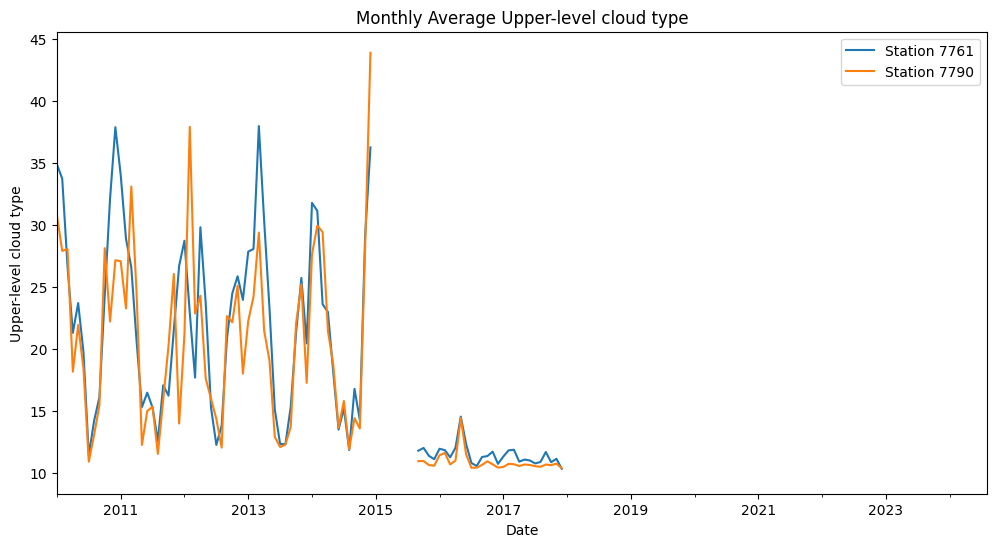

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


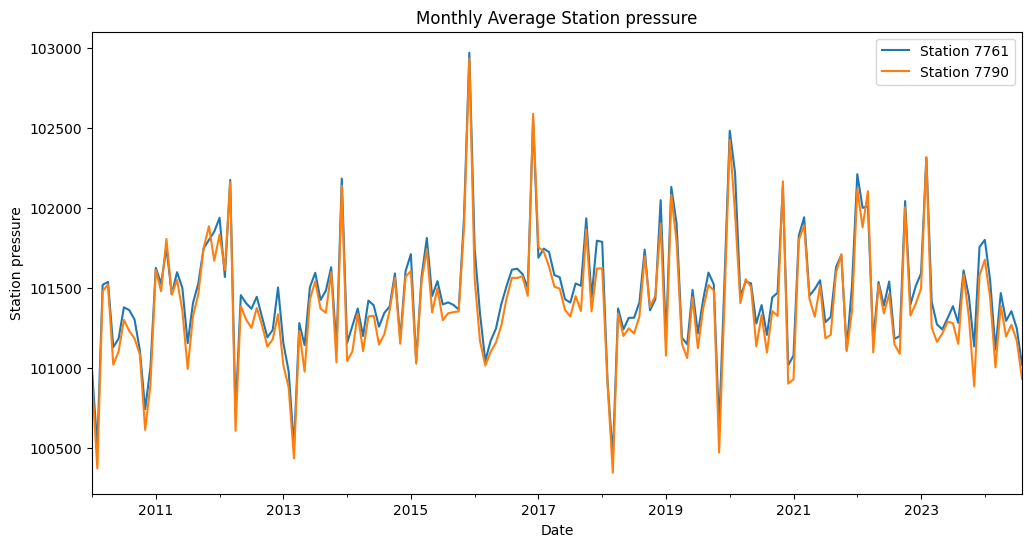

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


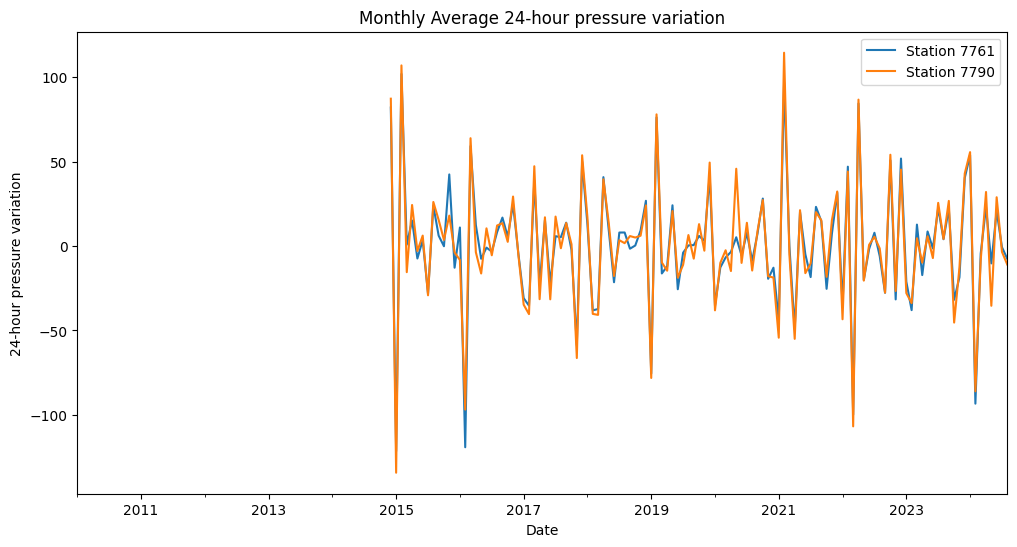

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


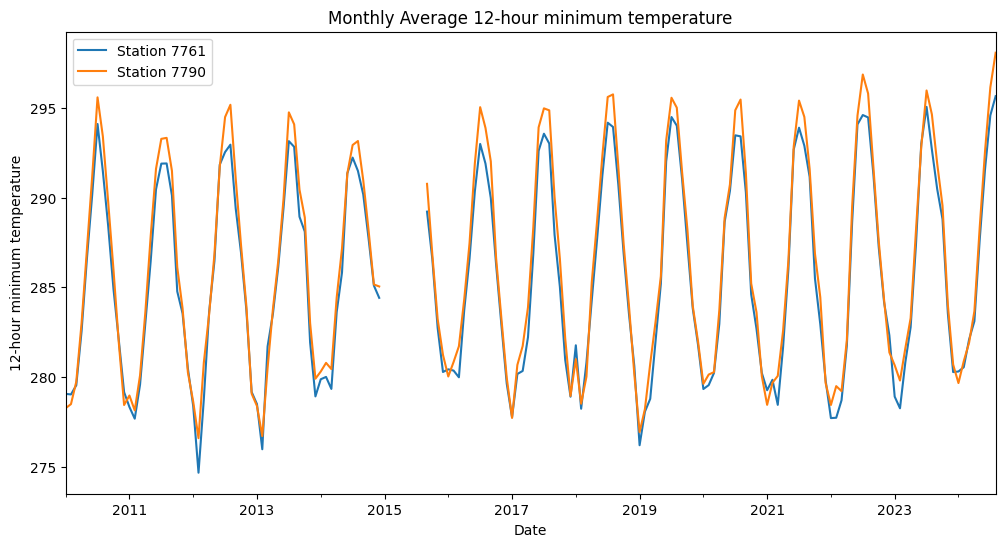

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


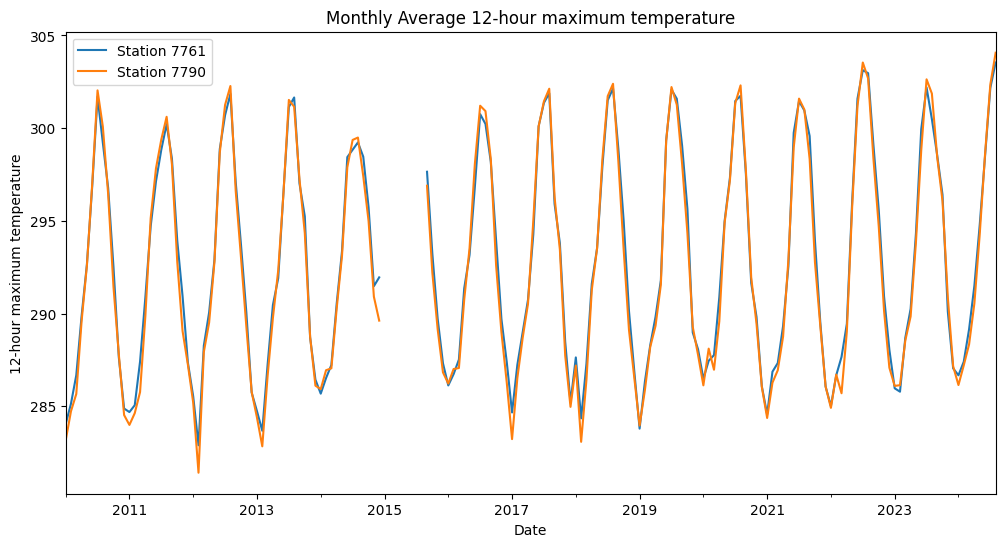

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


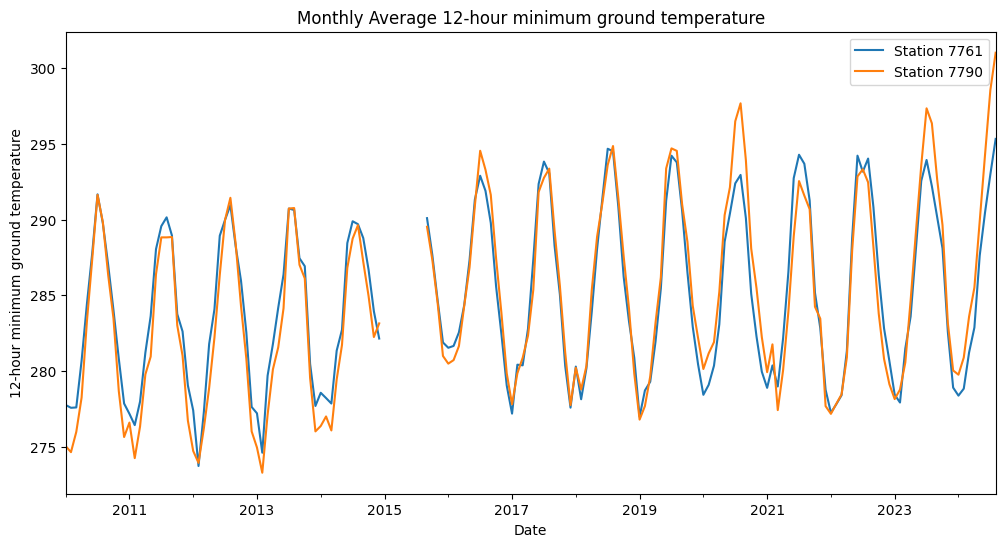

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


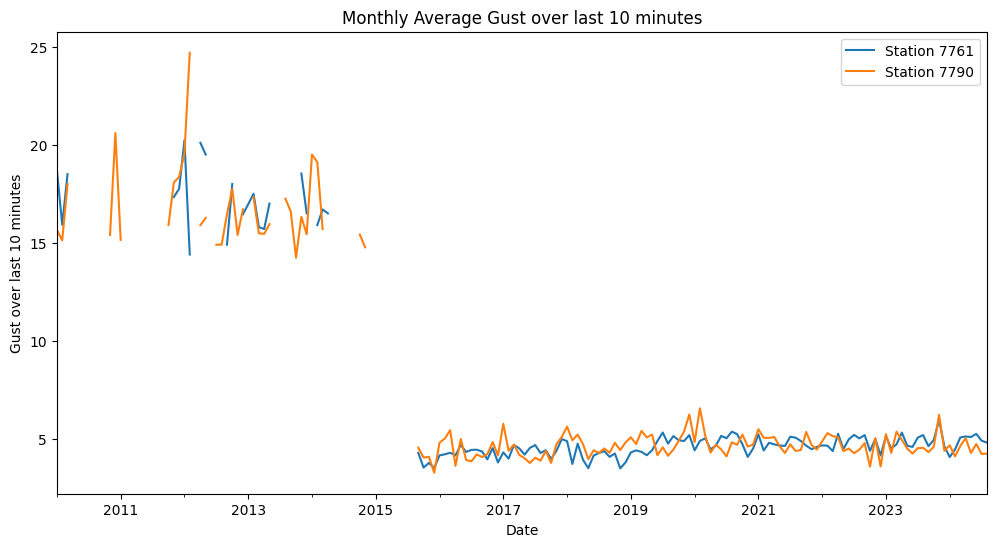

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


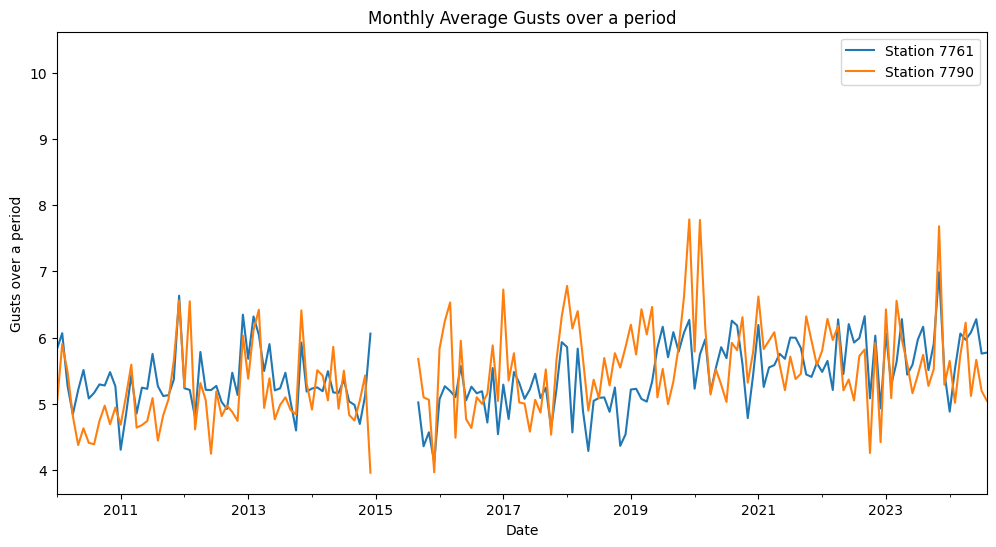

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


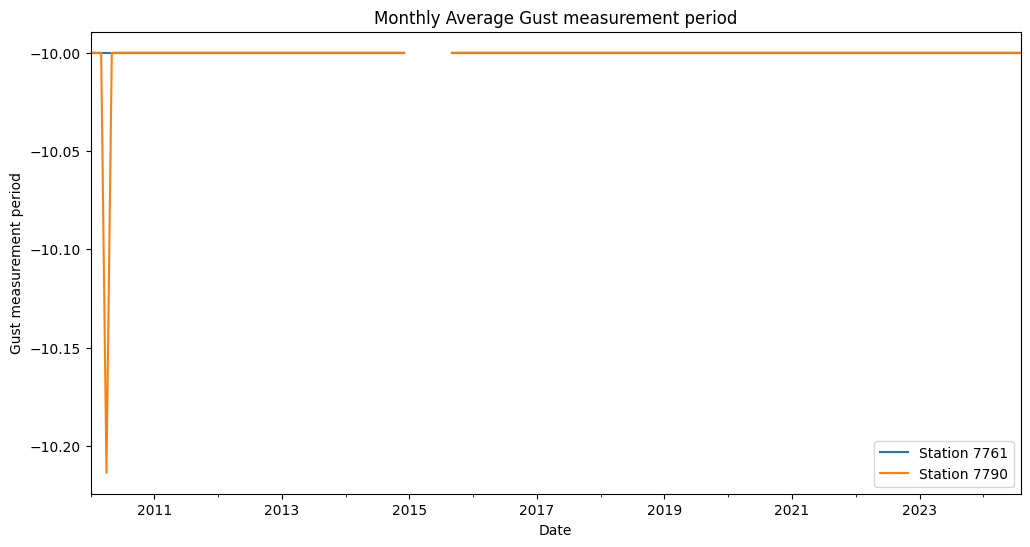

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


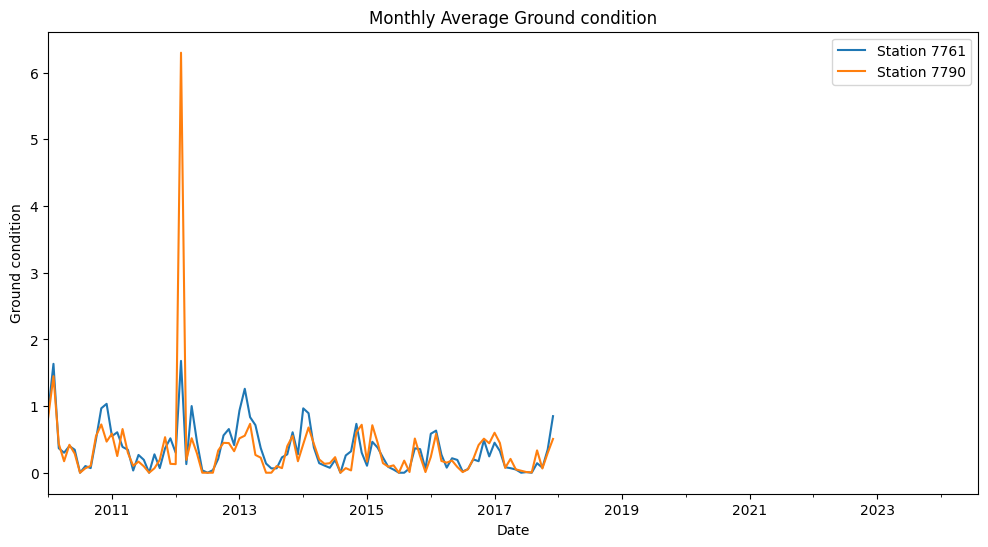

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


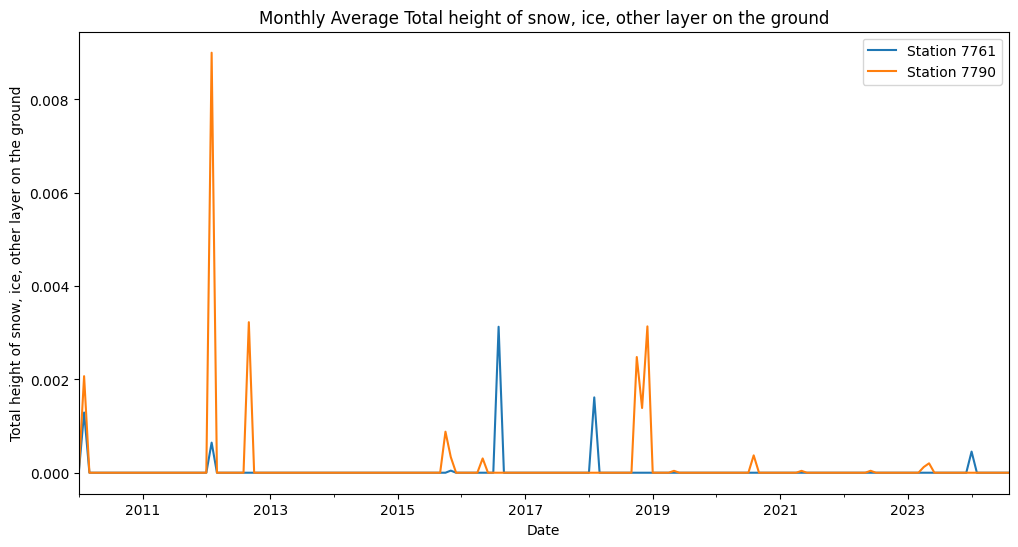

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


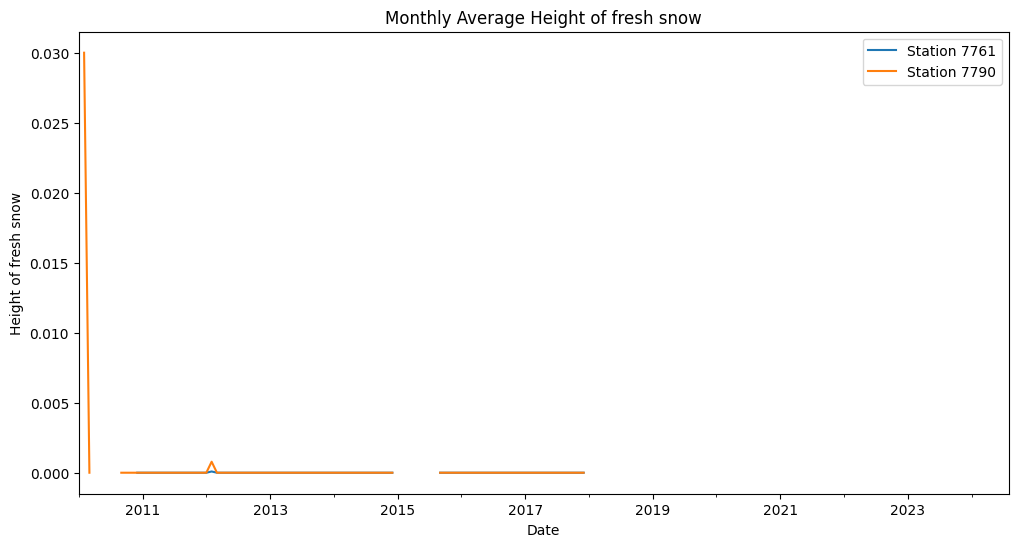

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


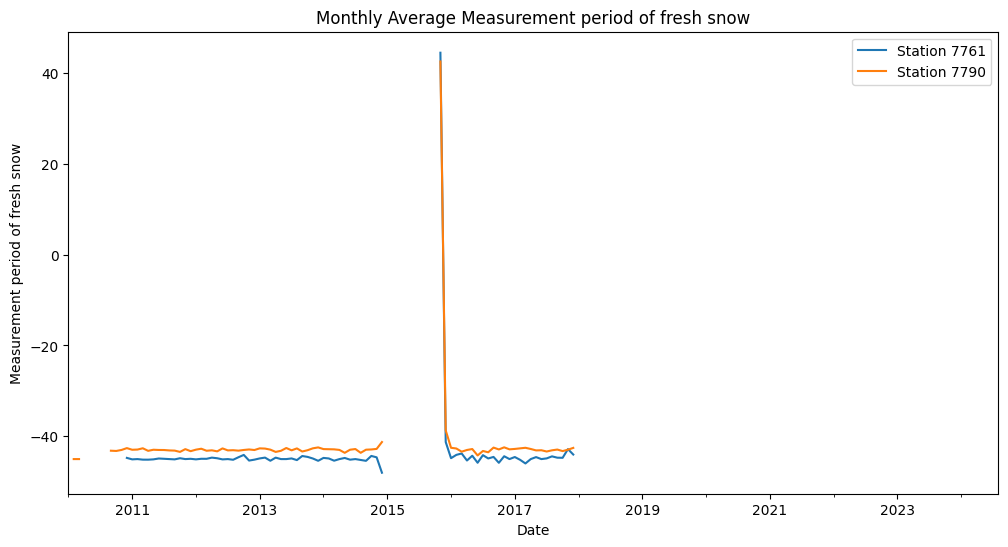

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


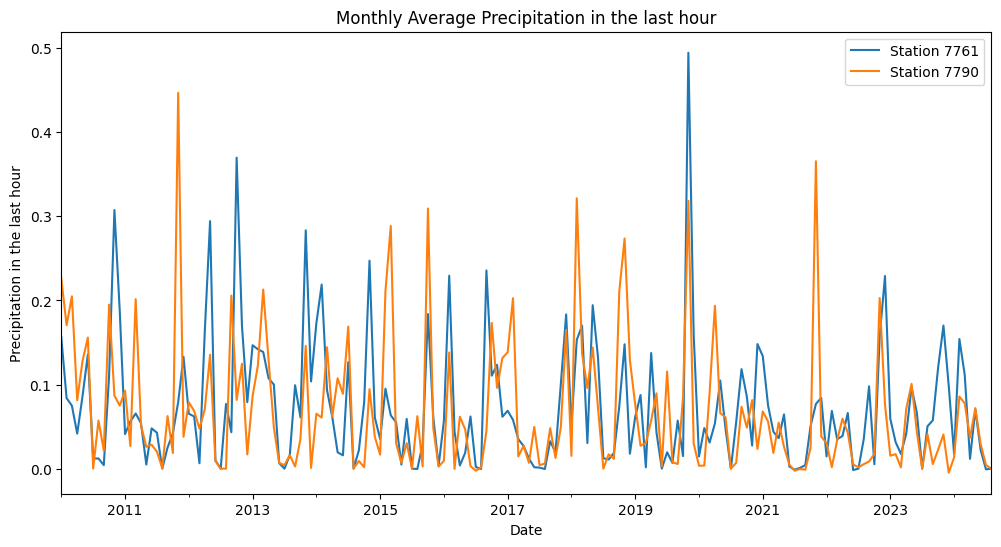

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


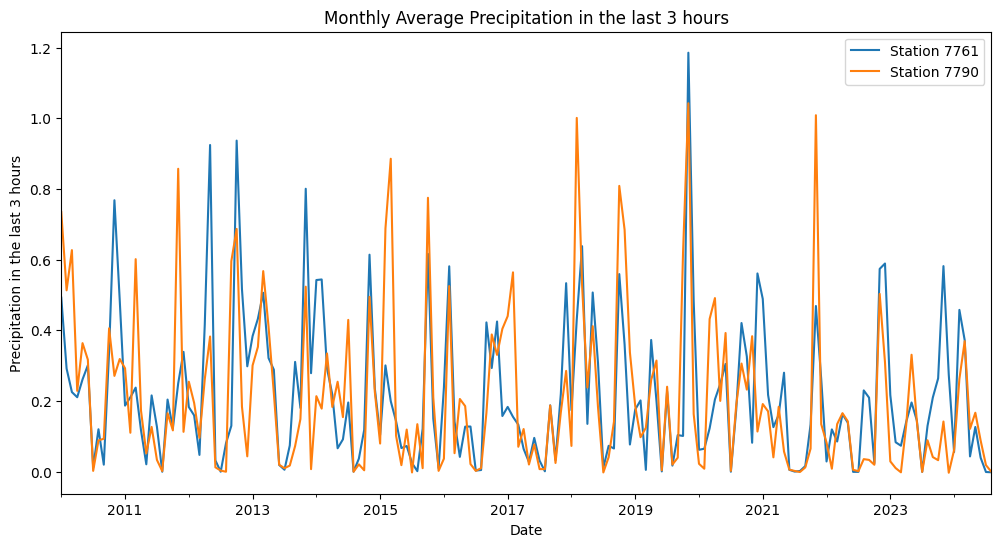

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


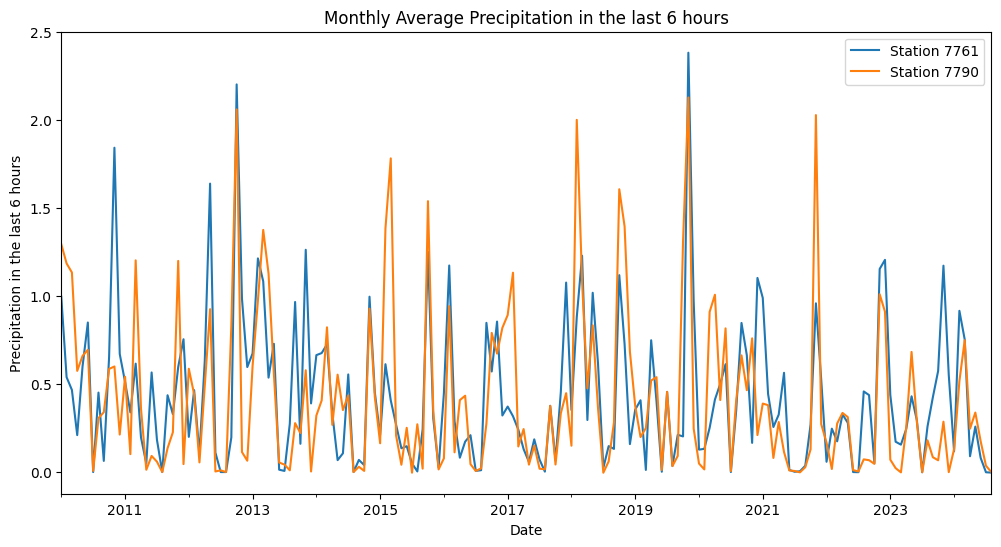

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


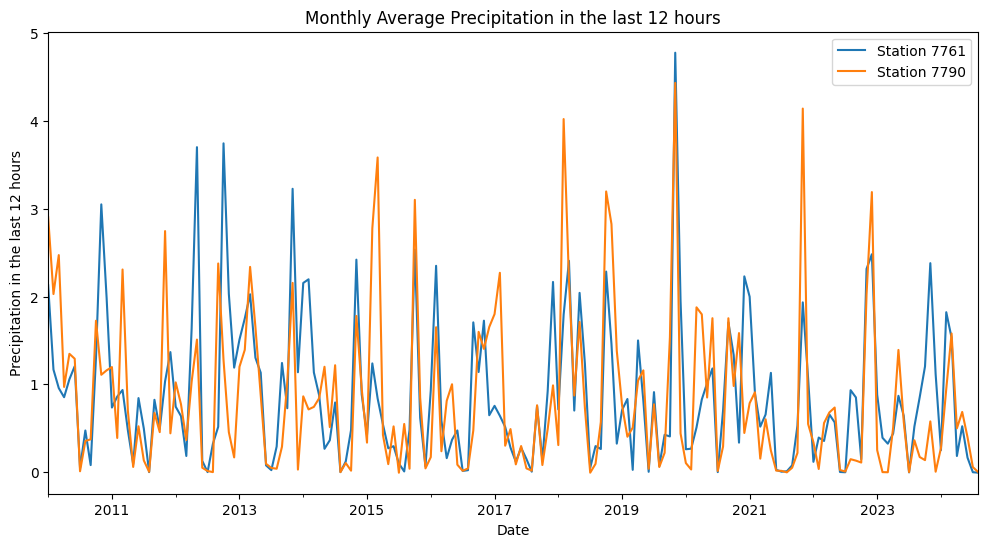

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


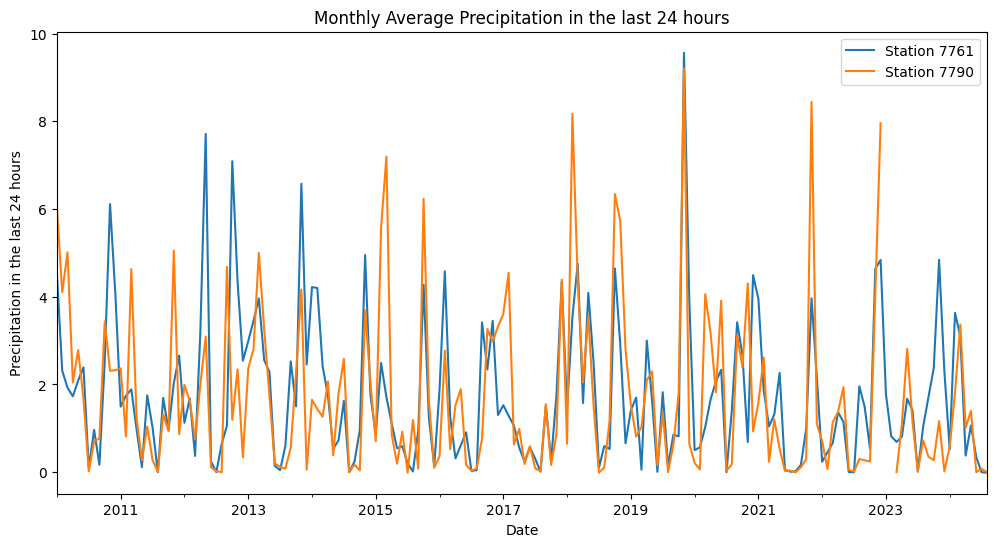

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


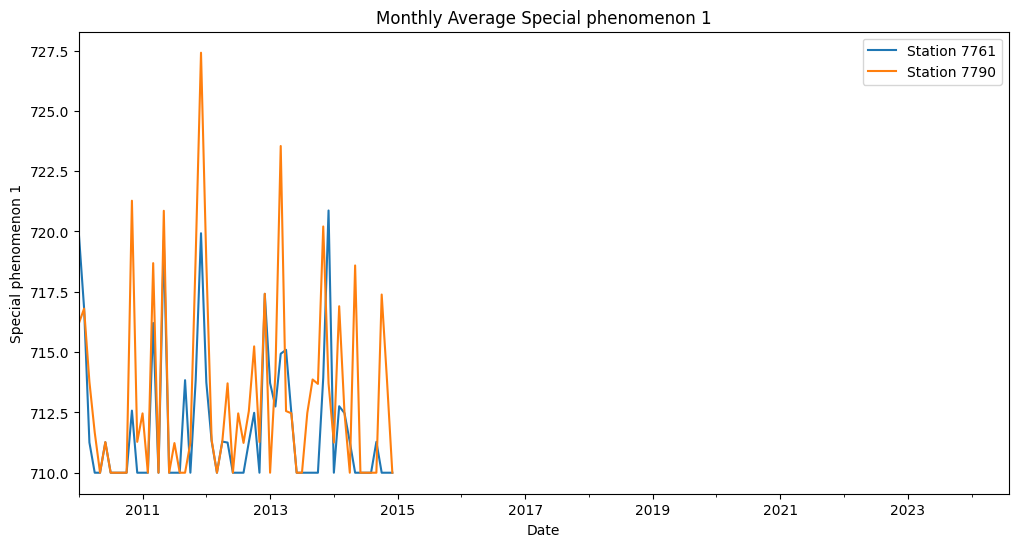

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


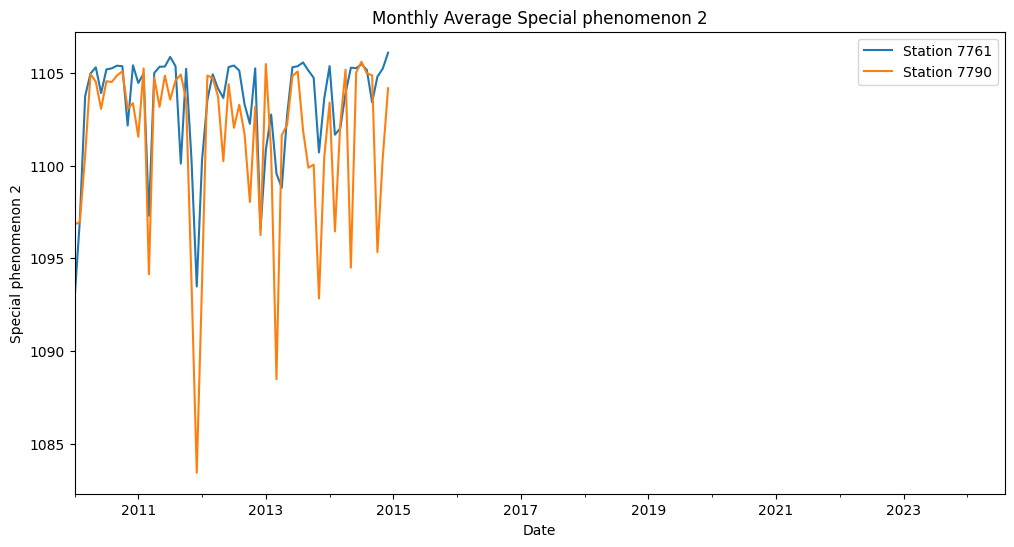

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


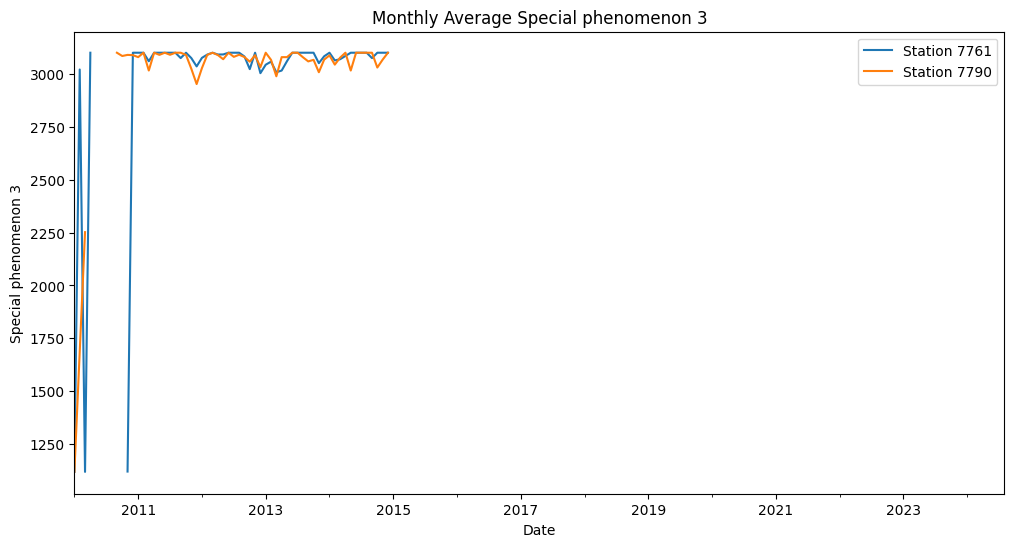

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


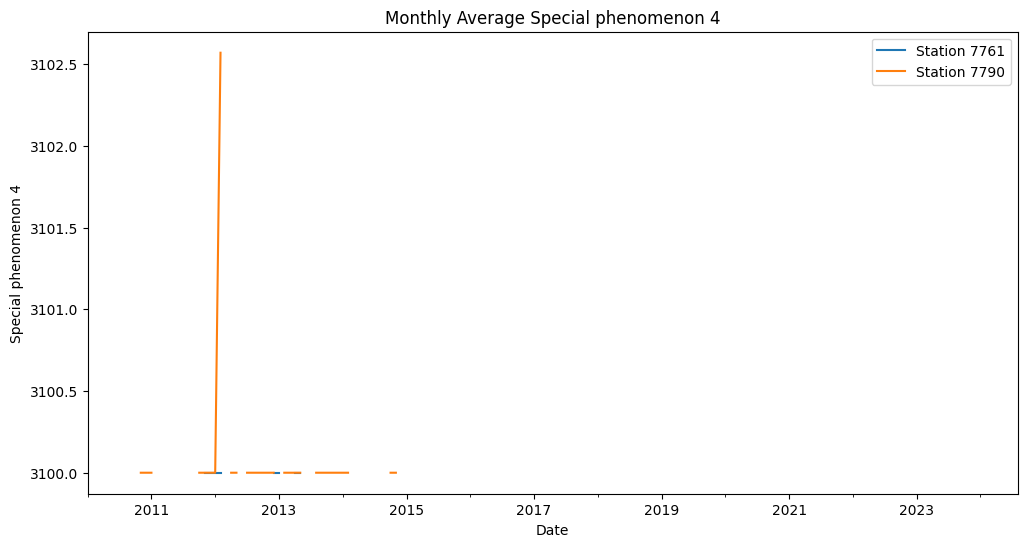

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


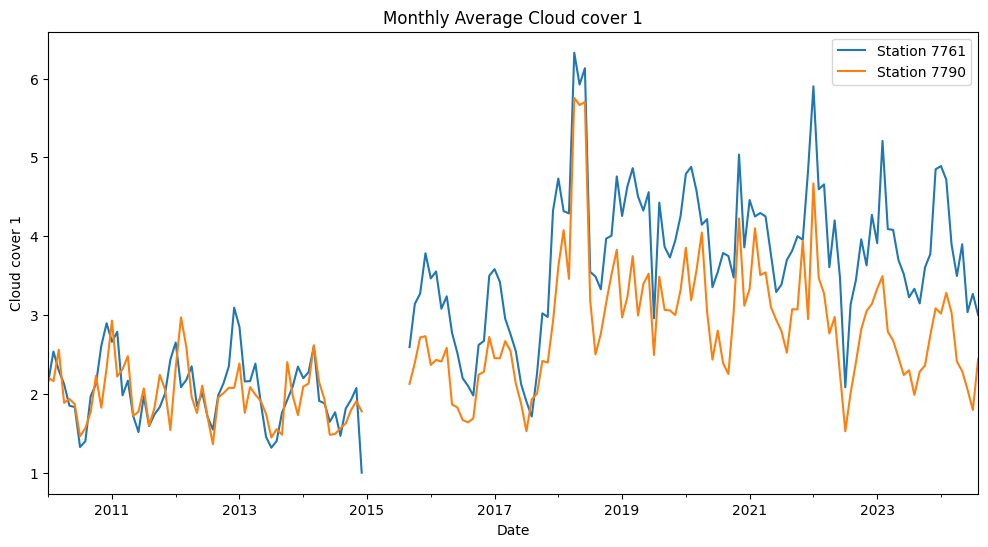

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


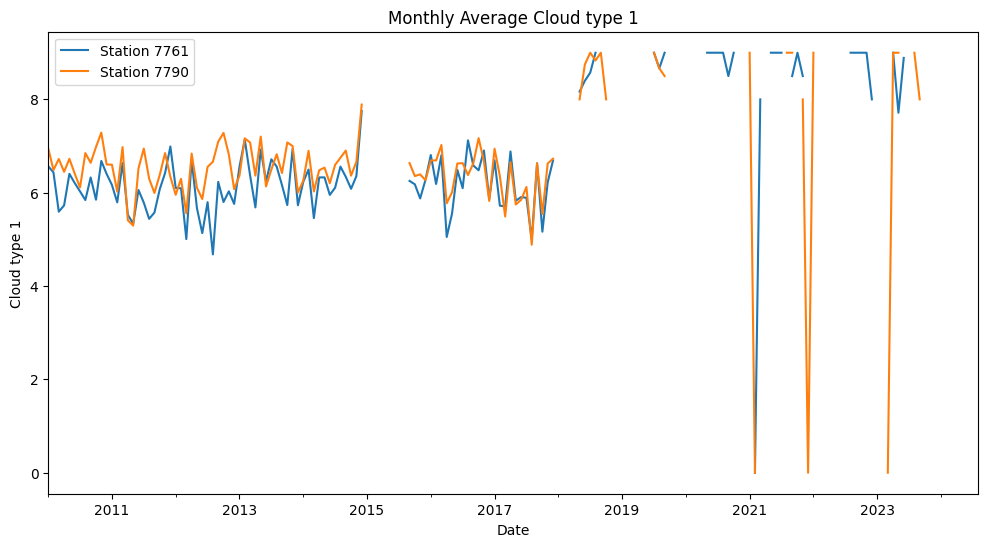

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


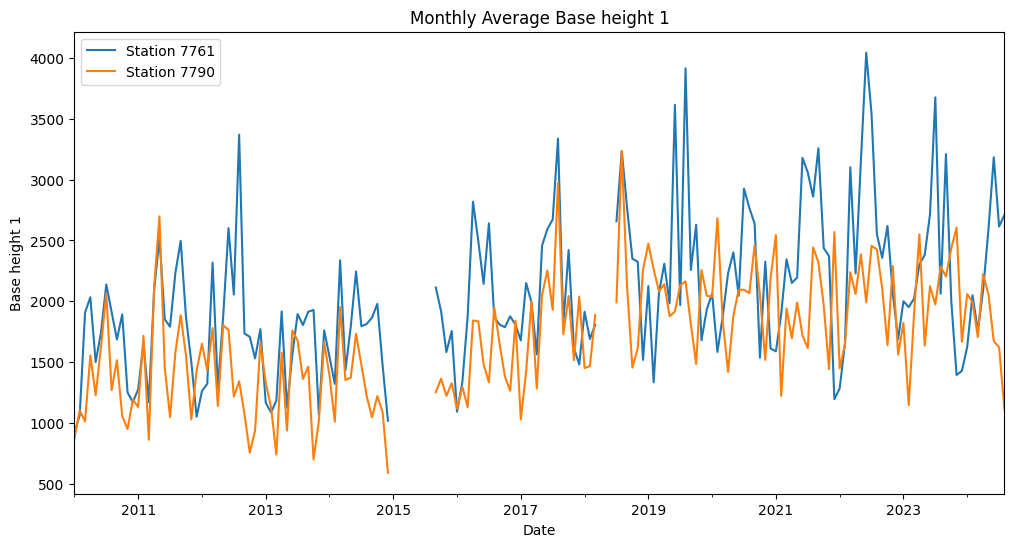

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


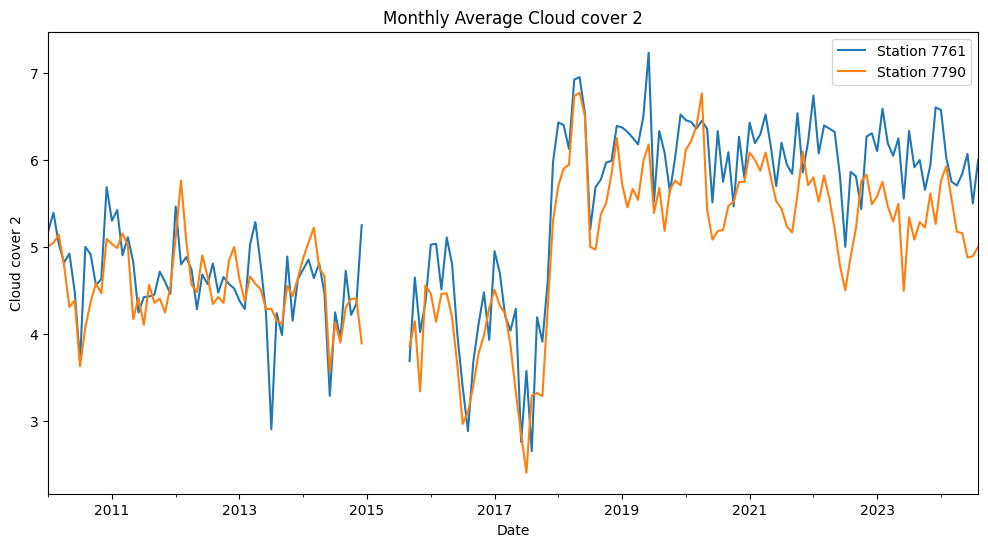

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


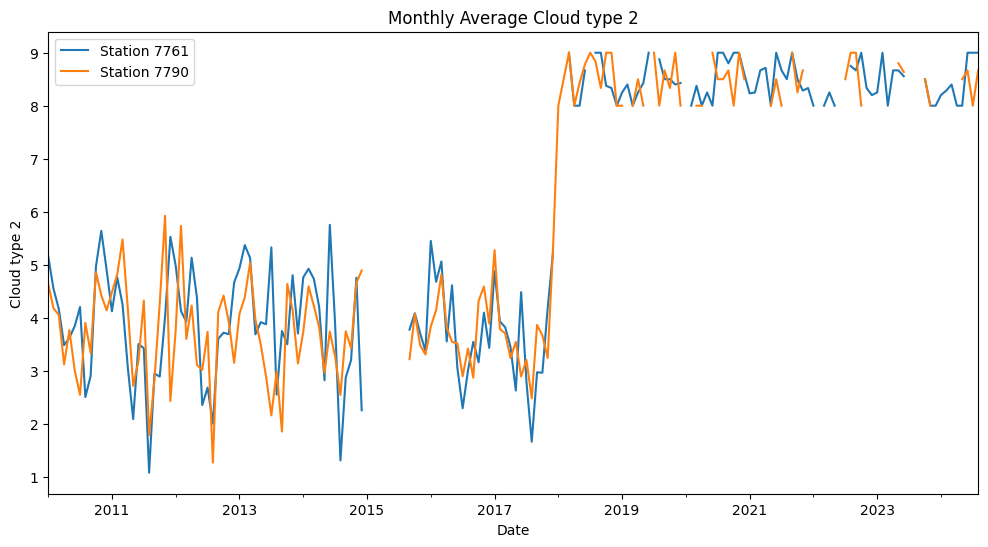

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


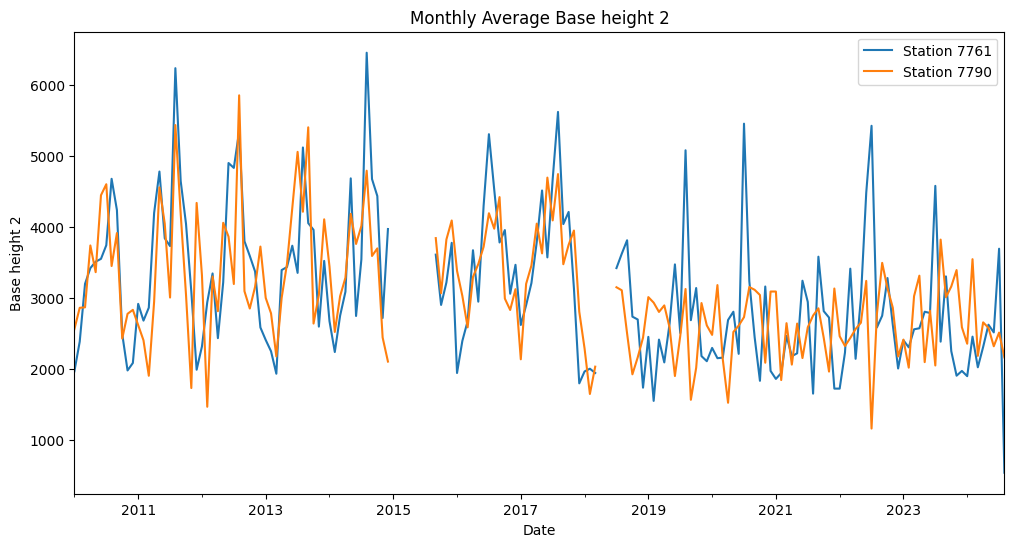

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


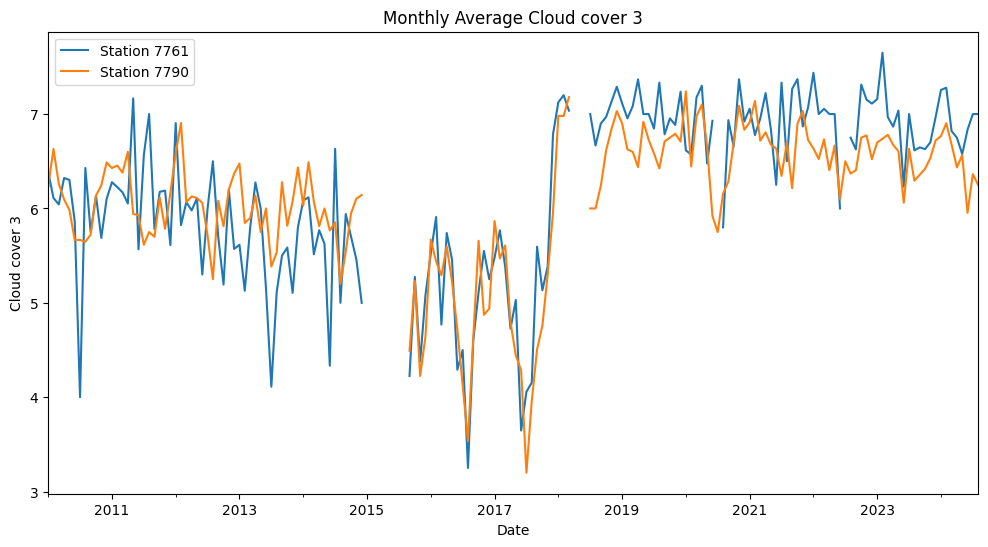

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


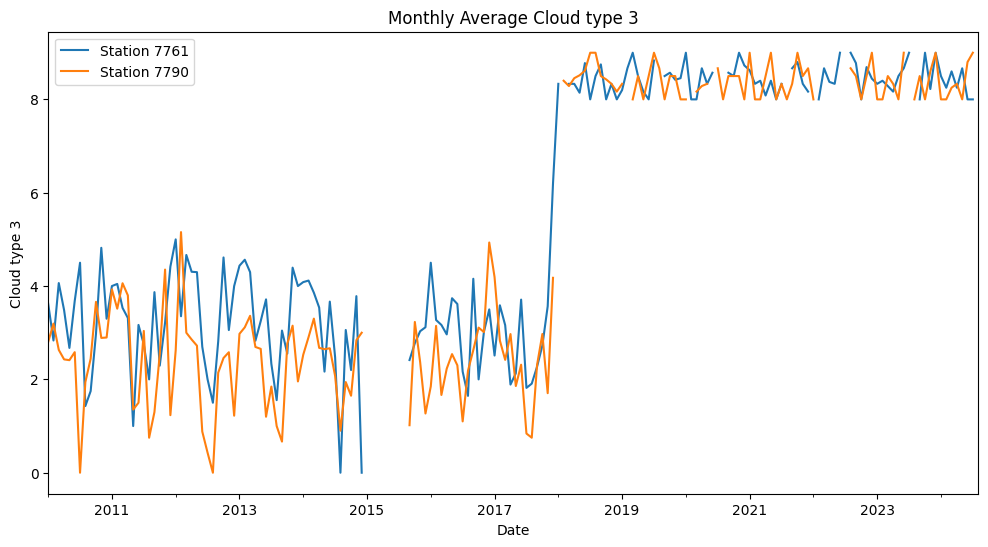

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


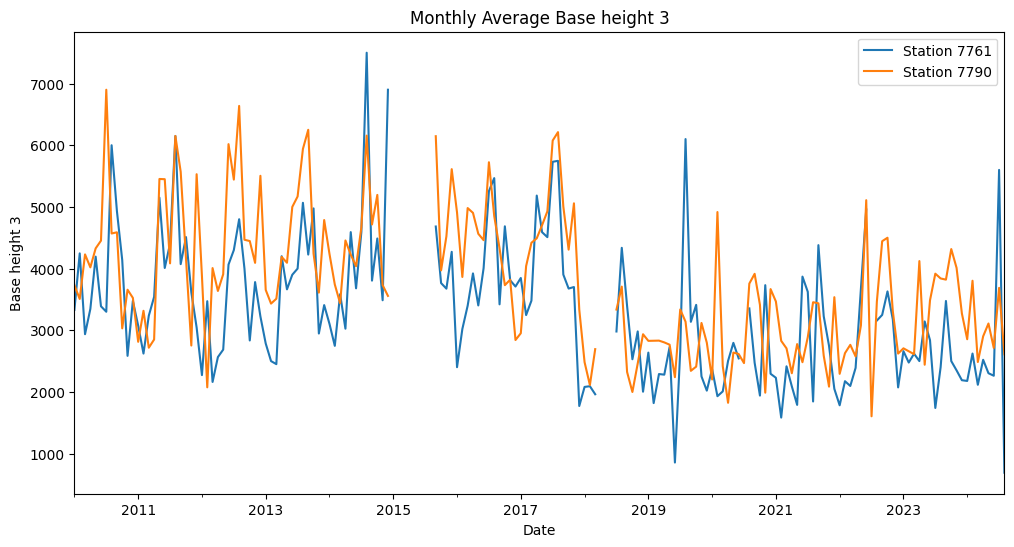

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


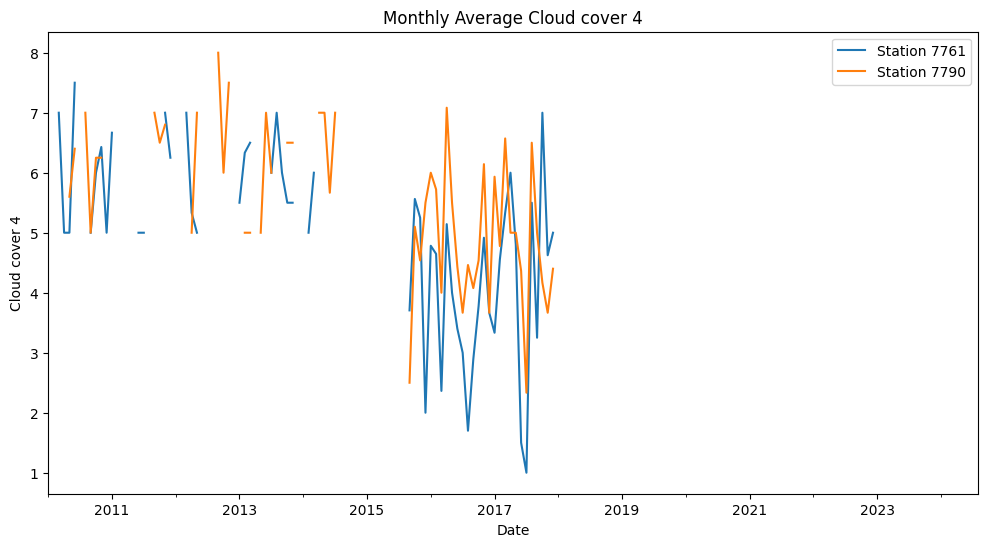

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


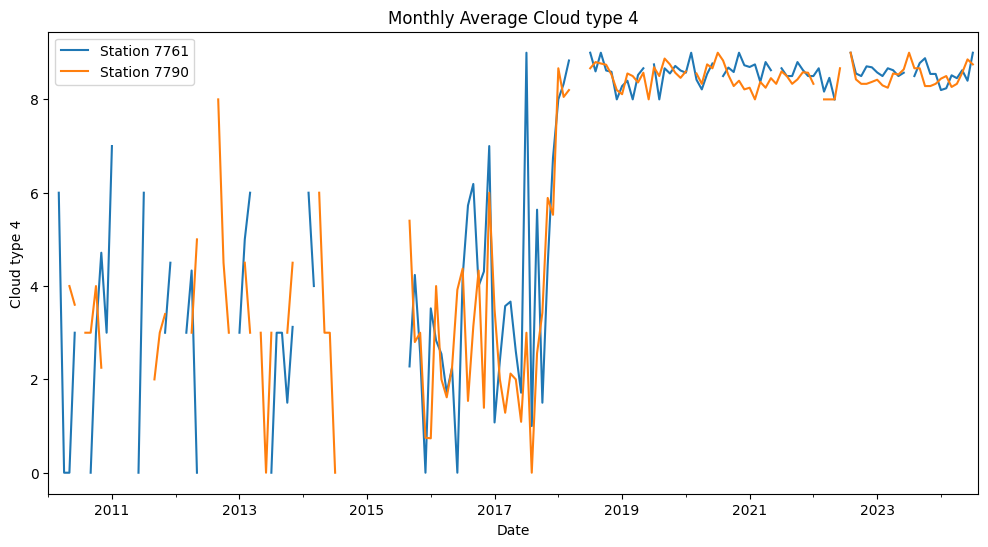

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


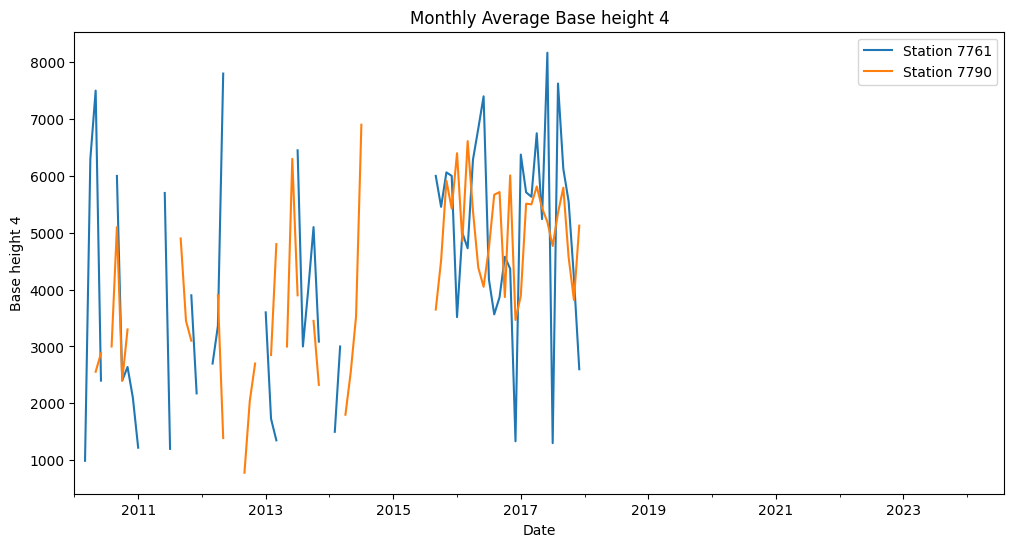

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


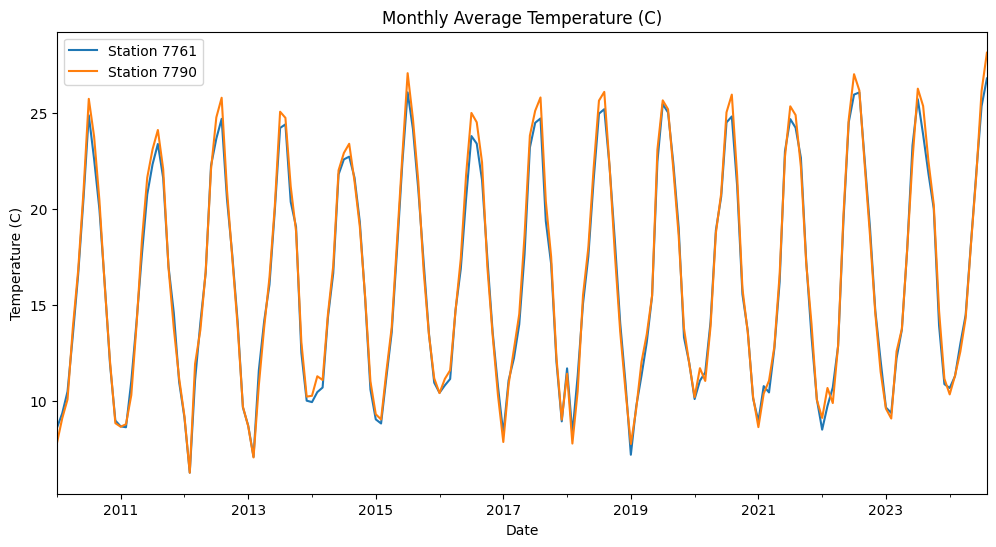

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


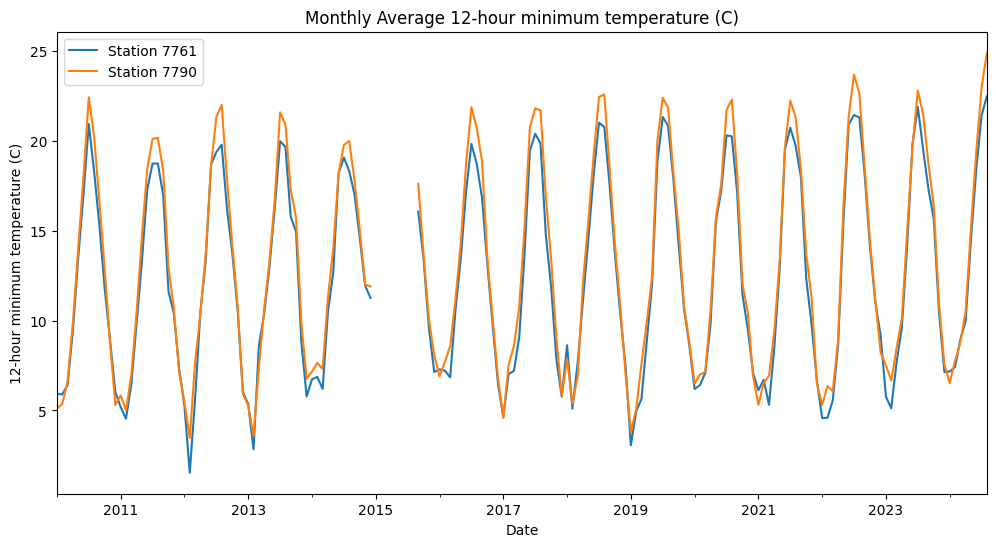

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


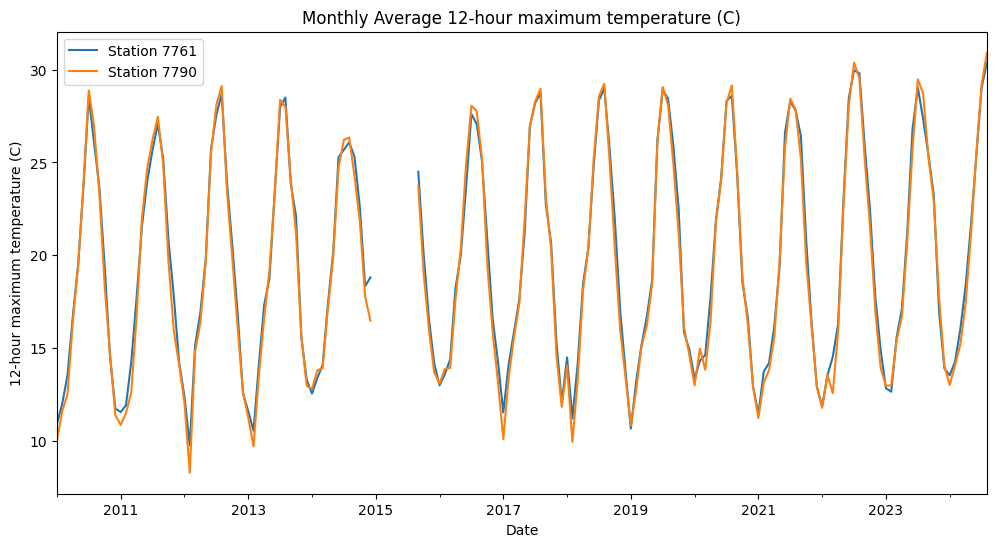

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


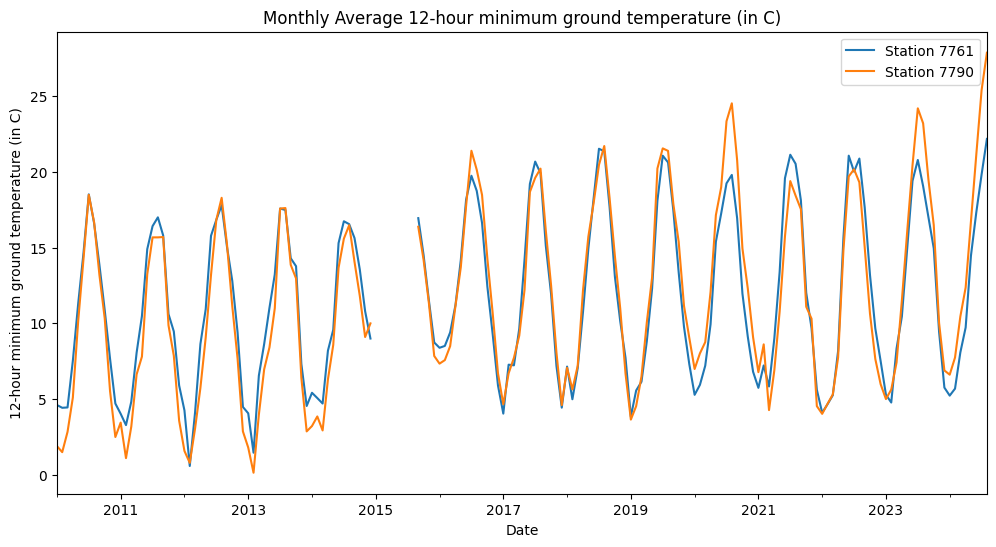

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


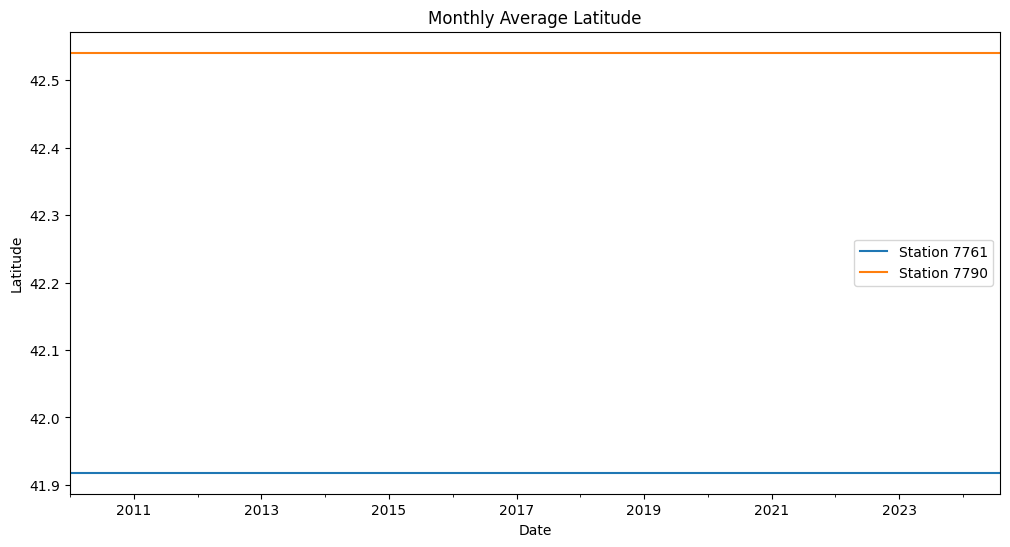

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


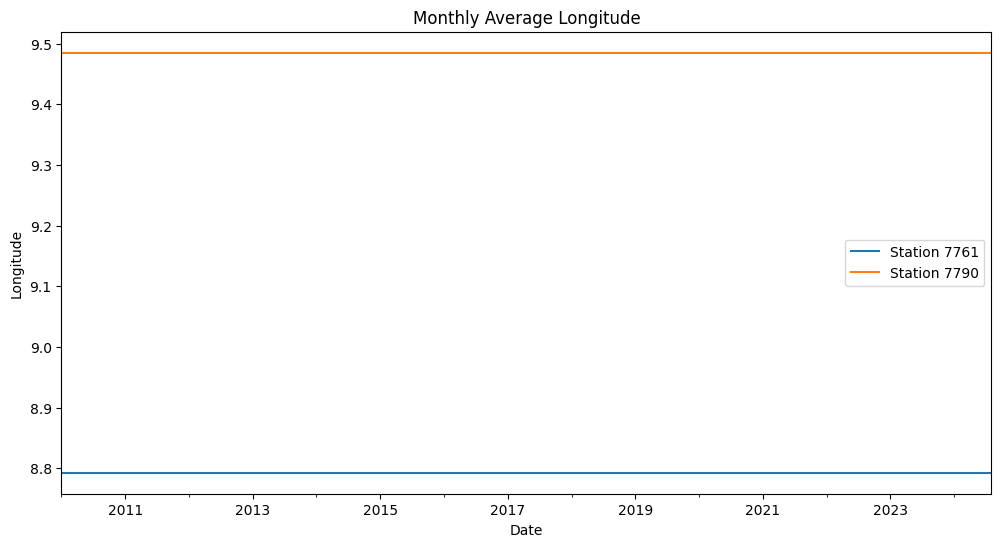

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


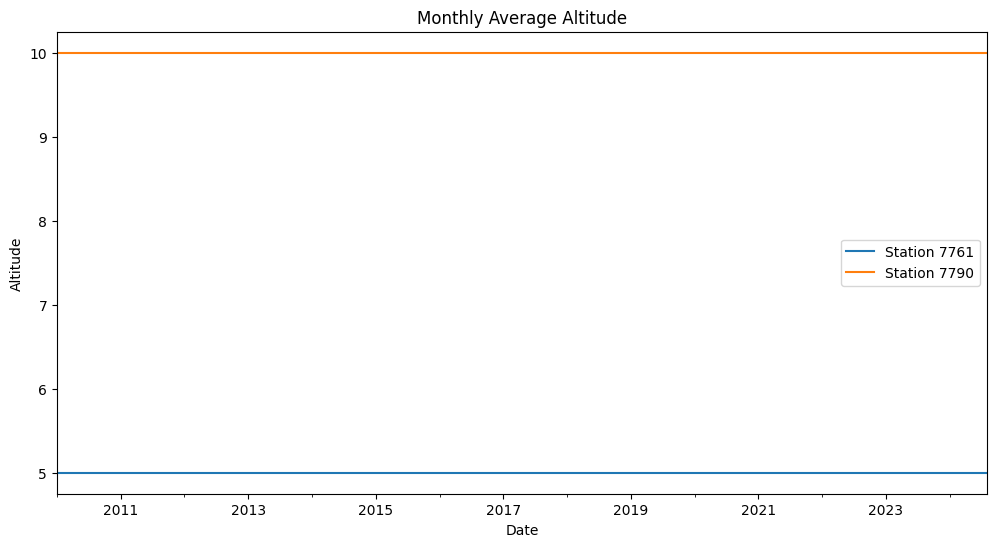

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


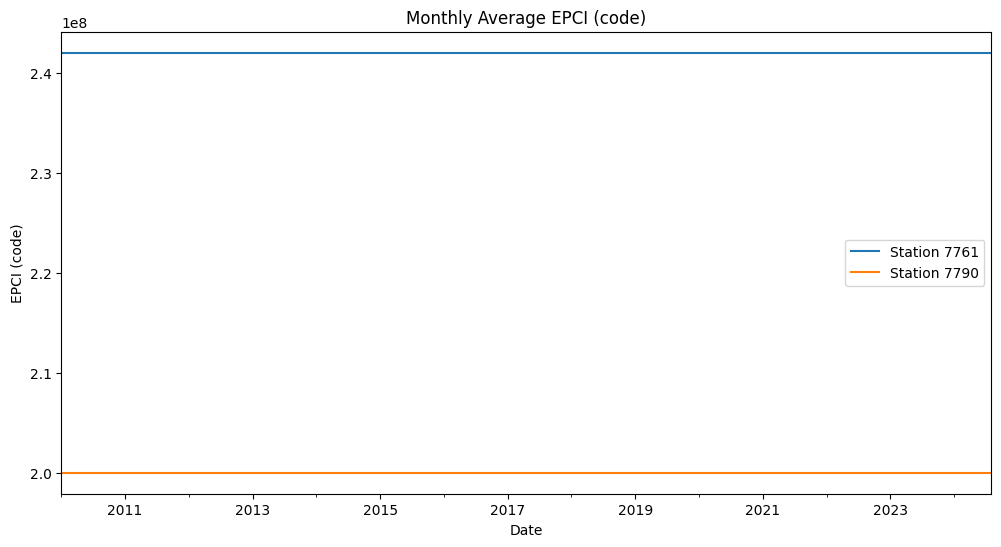

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


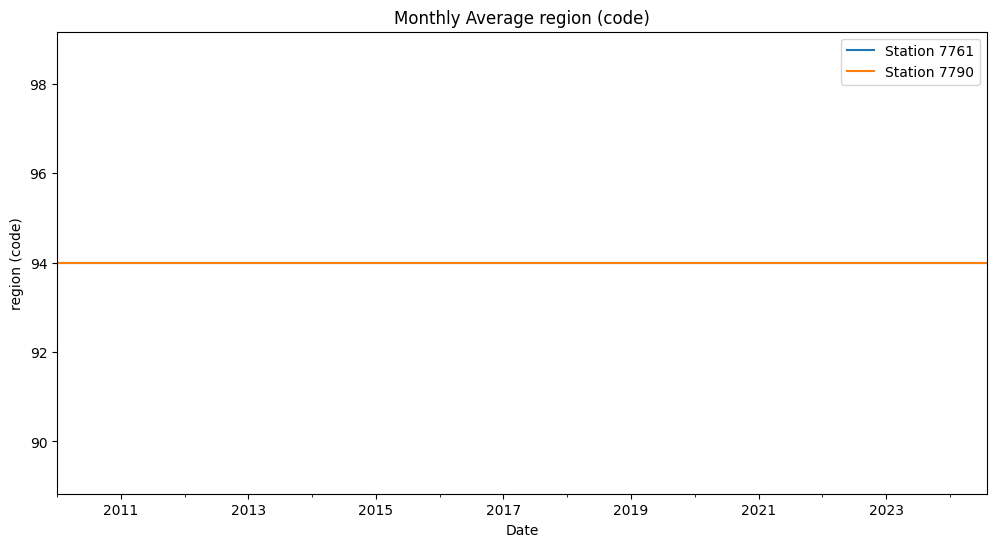

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3155659236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()


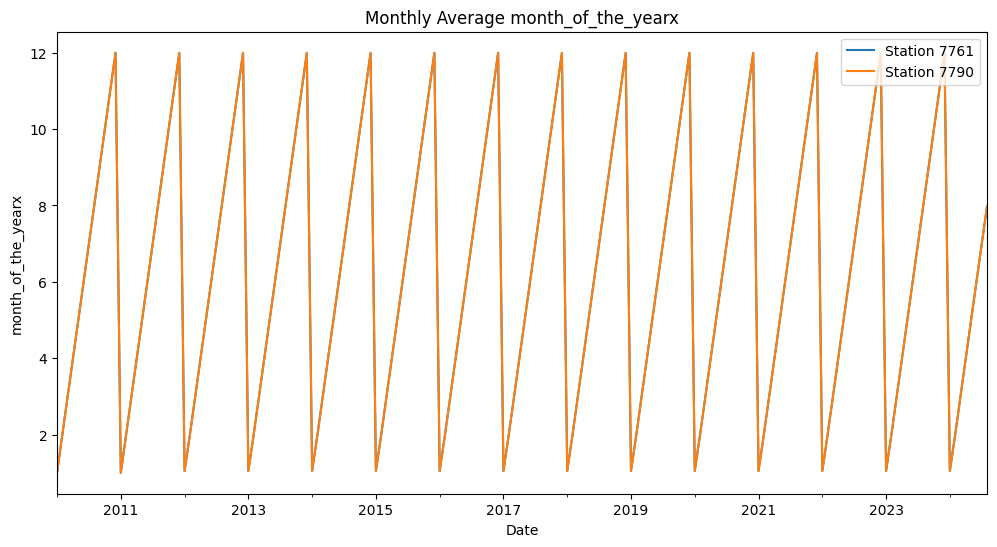

In [12]:
# BUNU EKLEDİM
import os

# Klasörün var olup olmadığını kontrol edin, yoksa oluşturun
output_dir = "NumericalColumnsStationComparison"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# BURAYA KADAR

# List of numerical columns to compare
numerical_cols = df.select_dtypes(include=['number']).columns

# Iterate through the numerical columns and create plots
for col in numerical_cols:
  # Calculate monthly averages for both stations
  monthly_avg_7761 = df_7761.resample('M', on='Date')[col].mean()
  monthly_avg_7790 = df_7790.resample('M', on='Date')[col].mean()

  # Create a figure and axes
  fig, ax = plt.subplots(figsize=(12, 6))

  # Plot the monthly averages
  monthly_avg_7761.plot(ax=ax, label='Station 7761')
  monthly_avg_7790.plot(ax=ax, label='Station 7790')

  # Set the title and labels
  ax.set_title(f'Monthly Average {col}')
  ax.set_xlabel('Date')
  ax.set_ylabel(col)
  ax.legend()

  # Display the plot
  plt.savefig(f"NumericalColumnsStationComparison/{col}.png")
  plt.show()

In [13]:
from scipy import stats

# Sıcaklık için t-testi
t_stat, p_value = stats.ttest_ind(df_7761['Temperature (C)'].dropna(), df_7790['Temperature (C)'].dropna())
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -4.386237288552386, P-value: 1.1546693789561611e-05


In [14]:
numerical_cols = df.select_dtypes(include=['number']).columns
print(numerical_cols)

Index(['WMO Station ID', 'Sea level pressure', '3-hour pressure variation',
       'Barometric trend type', '10-min mean wind direction',
       '10-min mean wind speed', 'Temperature', 'Dew point', 'Humidity',
       'Horizontal visibility', 'Present weather', 'Past weather 1',
       'Past weather 2', 'Total cloud cover', 'Lower-level cloud cover',
       'Lower-level cloud base height', 'Lower-level cloud type',
       'Middle-level cloud type', 'Upper-level cloud type', 'Station pressure',
       '24-hour pressure variation', '12-hour minimum temperature',
       '12-hour maximum temperature', '12-hour minimum ground temperature',
       'Gust over last 10 minutes', 'Gusts over a period',
       'Gust measurement period', 'Ground condition',
       'Total height of snow, ice, other layer on the ground',
       'Height of fresh snow', 'Measurement period of fresh snow',
       'Precipitation in the last hour', 'Precipitation in the last 3 hours',
       'Precipitation in the last 6 

In [15]:
# scaling columns btw -1 and 1
from sklearn.preprocessing import MinMaxScaler

numerical_cols = df.select_dtypes(include=['number']).columns
num_cols_list = list(numerical_cols)
num_cols_list.remove('WMO Station ID')
num_cols_index = pd.Index(num_cols_list)

scaler = MinMaxScaler(feature_range=(-1, 1))
df[num_cols_index] = scaler.fit_transform(df[num_cols_index])

## Do not forget reverse this action after prediction.
# # Assume these are model predictions (normalized)
# predictions = df[['salary']].values  # Example predictions

# # Inverse transform to original scale
# original_predictions = scaler.inverse_transform(predictions)

df_7761 = df[df['WMO Station ID'] == 7761]
df_7790 = df[df['WMO Station ID'] == 7790]

df_7761.reset_index(inplace=True)
df_7790.reset_index(inplace=True)

# Fill the missing values with interpolation
# df_7790 = df_7790.interpolate()
# df_7761 = df_7761.interpolate()

df.head()

WMO Station ID                Date  Sea level pressure  \
0            7761 2010-01-05 20:00:00           -0.486755   
1            7790 2010-03-01 17:00:00            0.056291   
2            7790 2010-02-27 23:00:00            0.009934   
3            7790 2010-02-28 11:00:00           -0.218543   
4            7790 2010-02-25 17:00:00           -0.082781   

   3-hour pressure variation  Barometric trend type  \
0                  -0.287356                   0.75   
1                  -0.229885                   0.25   
2                  -0.448276                   0.50   
3                  -0.091954                  -0.25   
4                  -0.264368                   0.75   

   10-min mean wind direction  10-min mean wind speed  Temperature  Dew point  \
0                   -0.666667               -0.851485    -0.262411   0.398798   
1                    0.833333               -0.643564    -0.234043   0.402806   
2                   -0.166667               -0.851485    -0.385343   0.262525   
3                    0.277778               -0.792079    -0.078014   0.398798   
4                   -0.833333               -0.851485    -0.096927   0.346693   

   Humidity  ...  Altitude  municipalities (name)  municipalities (code)  \
0  0.872340  ...      -1.0                Ajaccio                  2a004   
1  0.808511  ...       1.0               Lucciana                  2b148   
2  0.765957  ...       1.0               Lucciana                  2b148   
3  0.425532  ...       1.0               Lucciana                  2b148   
4  0.340426  ...       1.0               Lucciana                  2b148   

           EPCI (name)  EPCI (code)  department (name)  department (code)  \
0  CA du Pays Ajaccien          1.0       Corse-du-Sud                 2a   
1    CC de Marana-Golo         -1.0        Haute-Corse                 2b   
2    CC de Marana-Golo         -1.0        Haute-Corse                 2b   
3    CC de Marana-Golo         -1.0        Haute-Corse                 2b   
4    CC de Marana-Golo         -1.0        Haute-Corse                 2b   

   region (name)  region (code)  month_of_the_yearx  
0          Corse           -1.0           -1.000000  
1          Corse           -1.0           -0.636364  
2          Corse           -1.0           -0.818182  
3          Corse           -1.0           -0.818182  
4          Corse           -1.0           -0.818182  

[5 rows x 74 columns]

In [16]:
df_7790.head()

index  WMO Station ID                Date  Sea level pressure  \
0      1            7790 2010-03-01 17:00:00            0.056291   
1      2            7790 2010-02-27 23:00:00            0.009934   
2      3            7790 2010-02-28 11:00:00           -0.218543   
3      4            7790 2010-02-25 17:00:00           -0.082781   
4      5            7790 2010-02-25 23:00:00           -0.125828   

   3-hour pressure variation  Barometric trend type  \
0                  -0.229885                   0.25   
1                  -0.448276                   0.50   
2                  -0.091954                  -0.25   
3                  -0.264368                   0.75   
4                  -0.310345                   0.75   

   10-min mean wind direction  10-min mean wind speed  Temperature  Dew point  \
0                    0.833333               -0.643564    -0.234043   0.402806   
1                   -0.166667               -0.851485    -0.385343   0.262525   
2                    0.277778               -0.792079    -0.078014   0.398798   
3                   -0.833333               -0.851485    -0.096927   0.346693   
4                    0.388889               -0.950495    -0.446809   0.242485   

   ...  Altitude  municipalities (name)  municipalities (code)  \
0  ...       1.0               Lucciana                  2b148   
1  ...       1.0               Lucciana                  2b148   
2  ...       1.0               Lucciana                  2b148   
3  ...       1.0               Lucciana                  2b148   
4  ...       1.0               Lucciana                  2b148   

         EPCI (name)  EPCI (code)  department (name)  department (code)  \
0  CC de Marana-Golo         -1.0        Haute-Corse                 2b   
1  CC de Marana-Golo         -1.0        Haute-Corse                 2b   
2  CC de Marana-Golo         -1.0        Haute-Corse                 2b   
3  CC de Marana-Golo         -1.0        Haute-Corse                 2b   
4  CC de Marana-Golo         -1.0        Haute-Corse                 2b   

   region (name)  region (code)  month_of_the_yearx  
0          Corse           -1.0           -0.636364  
1          Corse           -1.0           -0.818182  
2          Corse           -1.0           -0.818182  
3          Corse           -1.0           -0.818182  
4          Corse           -1.0           -0.818182  

[5 rows x 75 columns]

In [17]:
df_7761 = df[df['WMO Station ID'] == 7761]
df_7790 = df[df['WMO Station ID'] == 7790]

df_7761.reset_index(inplace=True)
df_7790.reset_index(inplace=True)

In [18]:
df["Temperature (C)"].head()

0   -0.262411
1   -0.234043
2   -0.385343
3   -0.078014
4   -0.096927
Name: Temperature (C), dtype: float64

In [19]:
#eksik verileri dolduralim
df_7761['Sea level pressure'].fillna(df_7761['Sea level pressure'].mean(), inplace=True)
df_7761['3-hour pressure variation'].fillna(df_7761['3-hour pressure variation'].mean(), inplace=True)
df_7761['10-min mean wind direction'].fillna(df_7761['10-min mean wind direction'].mean(), inplace=True)
df_7761['10-min mean wind speed'].fillna(df_7761['10-min mean wind speed'].mean(), inplace=True)
df_7761['Dew point'].fillna(df_7761['Dew point'].mean(), inplace=True)
df_7761['Humidity'].fillna(df_7761['Humidity'].mean(), inplace=True)
df_7761['Horizontal visibility'].fillna(df_7761['Horizontal visibility'].mean(), inplace=True)
df_7761['Station pressure'].fillna(df_7761['Station pressure'].mean(), inplace=True)
df_7761['Temperature (C)'].fillna(df_7761['Temperature (C)'].mean(), inplace=True)

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3750156810.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_7761['Sea level pressure'].fillna(df_7761['Sea level pressure'].mean(), inplace=True)
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\3750156810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7761['Sea level pressure'].

In [20]:
df_7790['Sea level pressure'].fillna(df_7790['Sea level pressure'].mean(), inplace=True)
df_7790['3-hour pressure variation'].fillna(df_7790['3-hour pressure variation'].mean(), inplace=True)
df_7790['10-min mean wind direction'].fillna(df_7790['10-min mean wind direction'].mean(), inplace=True)
df_7790['10-min mean wind speed'].fillna(df_7790['10-min mean wind speed'].mean(), inplace=True)
df_7790['Dew point'].fillna(df_7790['Dew point'].mean(), inplace=True)
df_7790['Humidity'].fillna(df_7790['Humidity'].mean(), inplace=True)
df_7790['Horizontal visibility'].fillna(df_7790['Horizontal visibility'].mean(), inplace=True)
df_7790['Station pressure'].fillna(df_7790['Station pressure'].mean(), inplace=True)
df_7790['Temperature (C)'].fillna(df_7790['Temperature (C)'].mean(), inplace=True)

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\1308606057.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_7790['Sea level pressure'].fillna(df_7790['Sea level pressure'].mean(), inplace=True)
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\1308606057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7790['Sea level pressure'].

In [21]:
# prompt: federated learning yapmak için feature seçmek gerekiyor. hangi kolonların feature olarak daha doğru olacağını nasıl öğrenirim

import pandas as pd
# Feature Importance with Random Forest
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf_model = RandomForestRegressor()

# Fit the model to one of the datasets (e.g., df_7761)
rf_model.fit(df_7761[num_cols_index], df_7761['Temperature (C)']) # Assuming 'Temperature (C)' is the target variable

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': num_cols_index,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

print(importance_df)

# Feature Selection with Correlation
# Calculate correlations with the target variable ('Temperature (C)') for df_7761
correlations_7761 = df_7761[num_cols_index].corrwith(df_7761['Temperature (C)'])
print("Correlations with Temperature (C) for station 7761:\n", correlations_7761)

# Calculate correlations with the target variable ('Temperature (C)') for df_7790
correlations_7790 = df_7790[num_cols_index].corrwith(df_7790['Temperature (C)'])
print("\nCorrelations with Temperature (C) for station 7790:\n", correlations_7790)

# Select features with high absolute correlation values (e.g., above 0.5)
important_features_7761 = correlations_7761[abs(correlations_7761) > 0.5].index.tolist()
important_features_7790 = correlations_7790[abs(correlations_7790) > 0.5].index.tolist()

# Find common important features
common_important_features = list(set(important_features_7761) & set(important_features_7790))
print("\nCommon important features based on correlation:", common_important_features)

                   Feature    Importance
51         Temperature (C)  8.381120e-01
5              Temperature  1.618842e-01
7                 Humidity  9.261474e-07
4   10-min mean wind speed  5.548269e-07
24     Gusts over a period  4.534144e-07
..                     ...           ...
55                Latitude  0.000000e+00
56               Longitude  0.000000e+00
57                Altitude  0.000000e+00
58             EPCI (code)  0.000000e+00
59           region (code)  0.000000e+00

[61 rows x 2 columns]
Correlations with Temperature (C) for station 7761:
 Sea level pressure           -0.099389
3-hour pressure variation    -0.090966
Barometric trend type         0.071923
10-min mean wind direction    0.462689
10-min mean wind speed        0.162780
                                ...   
Longitude                          NaN
Altitude                           NaN
EPCI (code)                        NaN
region (code)                      NaN
month_of_the_yearx            0.283558
Len

c:\Users\hakta\OneDrive - GALATASARAY UNIVERSITESI\Masaüstü\PolyTech Angers\3ème Année\6ème Semestre\Stage 3A\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\hakta\OneDrive - GALATASARAY UNIVERSITESI\Masaüstü\PolyTech Angers\3ème Année\6ème Semestre\Stage 3A\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\hakta\OneDrive - GALATASARAY UNIVERSITESI\Masaüstü\PolyTech Angers\3ème Année\6ème Semestre\Stage 3A\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\hakta\OneDrive - GALATASARAY UNIVERSITESI\Masaüstü\PolyTech Angers\3ème Année\6ème Semestre\Stage 3A\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [22]:
type(common_important_features)

list

In [23]:
common_important_features.remove('Temperature (C)')

In [24]:
common_important_features

['12-hour minimum ground temperature',
 '12-hour minimum temperature (C)',
 '12-hour maximum temperature',
 '12-hour minimum temperature',
 'Temperature',
 'Dew point',
 '12-hour maximum temperature (C)',
 '12-hour minimum ground temperature (in C)']

In [25]:
# Yukarda en önemsiz ortak kolonları elersek belki daha iyi sonuçlar elde edebiliriz:
df_7761.drop(columns=common_important_features, inplace=True, axis=1)
df_7790.drop(columns=common_important_features, inplace=True, axis=1)

C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\2420343125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7761.drop(columns=common_important_features, inplace=True, axis=1)
C:\Users\hakta\AppData\Local\Temp\ipykernel_20412\2420343125.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7790.drop(columns=common_important_features, inplace=True, axis=1)


In [26]:
data = pd.concat([df_7761, df_7790], axis=0)
data.reset_index(inplace=True)
data.head()

level_0  index  WMO Station ID                Date  Sea level pressure  \
0        0      0            7761 2010-01-05 20:00:00           -0.486755   
1        1      6            7761 2010-04-28 03:00:00            0.413907   
2        2      9            7761 2010-04-27 03:00:00            0.341060   
3        3     11            7761 2010-04-25 15:00:00            0.394040   
4        4     12            7761 2010-03-22 20:00:00            0.294702   

   3-hour pressure variation  Barometric trend type  \
0                  -0.287356                   0.75   
1                  -0.114943                  -0.75   
2                  -0.287356                   1.00   
3                  -0.126437                  -0.75   
4                  -0.172414                   0.25   

   10-min mean wind direction  10-min mean wind speed  Humidity  ...  \
0                   -0.666667               -0.851485  0.872340  ...   
1                   -0.722222               -0.742574  0.872340  ...   
2                   -0.777778               -0.742574  0.851064  ...   
3                    0.222222               -0.594059  0.531915  ...   
4                    0.166667               -0.950495  0.829787  ...   

   Altitude  municipalities (name)  municipalities (code)  \
0      -1.0                Ajaccio                  2a004   
1      -1.0                Ajaccio                  2a004   
2      -1.0                Ajaccio                  2a004   
3      -1.0                Ajaccio                  2a004   
4      -1.0                Ajaccio                  2a004   

           EPCI (name)  EPCI (code)  department (name)  department (code)  \
0  CA du Pays Ajaccien          1.0       Corse-du-Sud                 2a   
1  CA du Pays Ajaccien          1.0       Corse-du-Sud                 2a   
2  CA du Pays Ajaccien          1.0       Corse-du-Sud                 2a   
3  CA du Pays Ajaccien          1.0       Corse-du-Sud                 2a   
4  CA du Pays Ajaccien          1.0       Corse-du-Sud                 2a   

   region (name)  region (code)  month_of_the_yearx  
0          Corse           -1.0           -1.000000  
1          Corse           -1.0           -0.454545  
2          Corse           -1.0           -0.454545  
3          Corse           -1.0           -0.454545  
4          Corse           -1.0           -0.636364  

[5 rows x 68 columns]

In [27]:
data.drop(columns=['index', 'level_0'], inplace=True, axis=1)

In [28]:
len(data)

85123

In [29]:
data.head()

WMO Station ID                Date  Sea level pressure  \
0            7761 2010-01-05 20:00:00           -0.486755   
1            7761 2010-04-28 03:00:00            0.413907   
2            7761 2010-04-27 03:00:00            0.341060   
3            7761 2010-04-25 15:00:00            0.394040   
4            7761 2010-03-22 20:00:00            0.294702   

   3-hour pressure variation  Barometric trend type  \
0                  -0.287356                   0.75   
1                  -0.114943                  -0.75   
2                  -0.287356                   1.00   
3                  -0.126437                  -0.75   
4                  -0.172414                   0.25   

   10-min mean wind direction  10-min mean wind speed  Humidity  \
0                   -0.666667               -0.851485  0.872340   
1                   -0.722222               -0.742574  0.872340   
2                   -0.777778               -0.742574  0.851064   
3                    0.222222               -0.594059  0.531915   
4                    0.166667               -0.950495  0.829787   

   Horizontal visibility  Present weather  ...  Altitude  \
0              -0.733333         0.237113  ...      -1.0   
1              -0.680000        -0.958763  ...      -1.0   
2              -0.546667        -0.958763  ...      -1.0   
3              -0.600000        -0.958763  ...      -1.0   
4              -0.680000        -0.958763  ...      -1.0   

   municipalities (name)  municipalities (code)          EPCI (name)  \
0                Ajaccio                  2a004  CA du Pays Ajaccien   
1                Ajaccio                  2a004  CA du Pays Ajaccien   
2                Ajaccio                  2a004  CA du Pays Ajaccien   
3                Ajaccio                  2a004  CA du Pays Ajaccien   
4                Ajaccio                  2a004  CA du Pays Ajaccien   

   EPCI (code)  department (name)  department (code)  region (name)  \
0          1.0       Corse-du-Sud                 2a          Corse   
1          1.0       Corse-du-Sud                 2a          Corse   
2          1.0       Corse-du-Sud                 2a          Corse   
3          1.0       Corse-du-Sud                 2a          Corse   
4          1.0       Corse-du-Sud                 2a          Corse   

   region (code)  month_of_the_yearx  
0           -1.0           -1.000000  
1           -1.0           -0.454545  
2           -1.0           -0.454545  
3           -1.0           -0.454545  
4           -1.0           -0.636364  

[5 rows x 66 columns]

In [30]:
data.columns

Index(['WMO Station ID', 'Date', 'Sea level pressure',
       '3-hour pressure variation', 'Barometric trend type',
       '10-min mean wind direction', '10-min mean wind speed', 'Humidity',
       'Horizontal visibility', 'Present weather', 'Past weather 1',
       'Past weather 2', 'Total cloud cover', 'Lower-level cloud cover',
       'Lower-level cloud base height', 'Lower-level cloud type',
       'Middle-level cloud type', 'Upper-level cloud type', 'Station pressure',
       '24-hour pressure variation', 'Gust over last 10 minutes',
       'Gusts over a period', 'Gust measurement period', 'Ground condition',
       'Total height of snow, ice, other layer on the ground',
       'Height of fresh snow', 'Measurement period of fresh snow',
       'Precipitation in the last hour', 'Precipitation in the last 3 hours',
       'Precipitation in the last 6 hours',
       'Precipitation in the last 12 hours',
       'Precipitation in the last 24 hours', 'Special phenomenon 1',
       'Spec

In [31]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85123 entries, 0 to 85122
Data columns (total 66 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   WMO Station ID                                        85123 non-null  int64         
 1   Date                                                  85123 non-null  datetime64[ns]
 2   Sea level pressure                                    85123 non-null  float64       
 3   3-hour pressure variation                             85123 non-null  float64       
 4   Barometric trend type                                 85058 non-null  float64       
 5   10-min mean wind direction                            85123 non-null  float64       
 6   10-min mean wind speed                                85123 non-null  float64       
 7   Humidity                                              85123 non-null  float6

## Model eğitelim

In [32]:
X.head()

NameError: name 'X' is not defined

In [167]:
data.drop(columns=['Base height 1','Base height 2','Base height 3','Base height 4','Cloud cover 1','Cloud cover 2','Cloud cover 3', 'Cloud cover 4'], inplace=True, axis=1)
df.drop(columns=['Base height 1','Base height 2','Base height 3','Base height 4','Cloud cover 1','Cloud cover 2','Cloud cover 3', 'Cloud cover 4'], inplace=True, axis=1)

In [ ]:

data.drop(columns=['Cloud type 1','Cloud type 2','Cloud type 3','Cloud type 4'], inplace=True, axis=1)
df.drop(columns=['Cloud type 1','Cloud type 2','Cloud type 3','Cloud type 4'], inplace=True, axis=1)

In [178]:
data.drop(columns=['Special phenomenon 3','Special phenomenon 4'], inplace=True, axis=1)
df.drop(columns=['Special phenomenon 3','Special phenomenon 4'], inplace=True, axis=1)

In [189]:
# data -> minmax scale edilmemiş hali
# df -> minmax scale edilmiş hali
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error, explained_variance_score

data_ = data.select_dtypes(include=['number'])
data_['Temperature (C)'].fillna(data['Temperature (C)'].mean(), inplace=True)

# Split the data into features and target variable
X = data_.drop(columns=['Temperature (C)', "WMO Station ID"], axis=1)
y = data_['Temperature (C)']
for column in X.columns:
    X[column] = X[column].fillna(X[column].mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.preprocessing import MinMaxScaler

numerical_cols = df.select_dtypes(include=['number']).columns
num_cols_list = list(numerical_cols)
num_cols_list.remove('WMO Station ID')
num_cols_index = pd.Index(num_cols_list)

scaler = MinMaxScaler(feature_range=(-1, 1))
df[num_cols_index] = scaler.fit_transform(df[num_cols_index])

data_2 = df.select_dtypes(include=['number'])
data_2['Temperature (C)'].fillna(df['Temperature (C)'].mean(), inplace=True)
# Split the data into features and target variable
X_2 = data_2.drop(columns=['Temperature (C)', "WMO Station ID"], axis=1)
y_2 = data_2['Temperature (C)']
for column in X_2.columns:
    X_2[column] = X_2[column].fillna(X_2[column].mean())

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

In [193]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error, explained_variance_score
import numpy as np

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor()

# Fit the model
rf_model.fit(X, y)

# Make predictions
predictions = rf_model.predict(X)

# Calculate evaluation metrics without minmax scaler
mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y, predictions)
evs = explained_variance_score(y, predictions)
mape = mean_absolute_percentage_error(y, predictions)
print("Results without minmax scaler")
print(f"Mean Absolute Error: {mae:.5f}")
print(f"Mean Squared Error: {mse:.5f}")
print(f"Root Mean Squared Error: {rmse:.5f}")
print(f"R^2 Score: {r2:.5f}")
print(f"Explained Variance Score: {evs:.5f}")
print(f"Mean Absolute Percentage Error: {mape:.5f}")

# Fit the model
rf_model.fit(X_2, y_2)

# Make predictions
predictions_2 = rf_model.predict(X_2)

# Calculate evaluation metrics with min max scaler
mae = mean_absolute_error(y_2, predictions_2)
mse = mean_squared_error(y_2, predictions_2)
rmse = np.sqrt(mse)
r2 = r2_score(y_2, predictions_2)
evs = explained_variance_score(y_2, predictions_2)
mape = mean_absolute_percentage_error(y_2, predictions_2)
print("Results with minmax scaler")
print(f"Mean Absolute Error: {mae:.5f}")
print(f"Mean Squared Error: {mse:.5f}")
print(f"Root Mean Squared Error: {rmse:.5f}")
print(f"R^2 Score: {r2:.5f}")
print(f"Explained Variance Score: {evs:.5f}")
print(f"Mean Absolute Percentage Error: {mape:.5f}")

Results without minmax scaler
Mean Absolute Error: 0.62498
Mean Squared Error: 0.67686
Root Mean Squared Error: 0.82272
R^2 Score: 0.98558
Explained Variance Score: 0.98558
Mean Absolute Percentage Error: 815666687677.56067
Results with minmax scaler
Mean Absolute Error: 0.00000
Mean Squared Error: 0.00000
Root Mean Squared Error: 0.00017
R^2 Score: 1.00000
Explained Variance Score: 1.00000
Mean Absolute Percentage Error: 0.00000


In [192]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression().fit(X, y)
predictions = clf.predict(X)


# Calculate evaluation metrics without minmax scaler
mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y, predictions)
evs = explained_variance_score(y, predictions)
mape = mean_absolute_percentage_error(y, predictions)
print("Results without minmax scaler")
print(f"Mean Absolute Error: {mae:.5f}")
print(f"Mean Squared Error: {mse:.5f}")
print(f"Root Mean Squared Error: {rmse:.5f}")
print(f"R^2 Score: {r2:.5f}")
print(f"Explained Variance Score: {evs:.5f}")
print(f"Mean Absolute Percentage Error: {mape:.5f}")

print("-----------------------------")
clf_2 = LinearRegression().fit(X_2, y_2)
predictions_2 = clf_2.predict(X_2)

# Calculate evaluation metrics with min max scaler
mae = mean_absolute_error(y_2, predictions_2)
mse = mean_squared_error(y_2, predictions_2)
rmse = np.sqrt(mse)
r2 = r2_score(y_2, predictions_2)
evs = explained_variance_score(y_2, predictions_2)
mape = mean_absolute_percentage_error(y_2, predictions_2)
print("Results with minmax scaler")
print(f"Mean Absolute Error: {mae:.5f}")
print(f"Mean Squared Error: {mse:.5f}")
print(f"Root Mean Squared Error: {rmse:.5f}")
print(f"R^2 Score: {r2:.5f}")
print(f"Explained Variance Score: {evs:.5f}")
print(f"Mean Absolute Percentage Error: {mape:.5f}")

Results without minmax scaler
Mean Absolute Error: 4.58802
Mean Squared Error: 31.95950
Root Mean Squared Error: 5.65327
R^2 Score: 0.31911
Explained Variance Score: 0.31911
Mean Absolute Percentage Error: 4462397039399.59473
-----------------------------
Results with minmax scaler
Mean Absolute Error: 0.00000
Mean Squared Error: 0.00000
Root Mean Squared Error: 0.00000
R^2 Score: 1.00000
Explained Variance Score: 1.00000
Mean Absolute Percentage Error: 0.00000


In [194]:
from sklearn.svm import SVR


svr = SVR().fit(X, y)
predictions = svr.predict(X)


# Calculate evaluation metrics without minmax scaler
mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y, predictions)
evs = explained_variance_score(y, predictions)
mape = mean_absolute_percentage_error(y, predictions)
print("Results without minmax scaler")
print(f"Mean Absolute Error: {mae:.5f}")
print(f"Mean Squared Error: {mse:.5f}")
print(f"Root Mean Squared Error: {rmse:.5f}")
print(f"R^2 Score: {r2:.5f}")
print(f"Explained Variance Score: {evs:.5f}")
print(f"Mean Absolute Percentage Error: {mape:.5f}")

print("-----------------------------")
svr_2 = SVR().fit(X_2, y_2)
predictions_2 = svr_2.predict(X_2)

# Calculate evaluation metrics with min max scaler
mae = mean_absolute_error(y_2, predictions_2)
mse = mean_squared_error(y_2, predictions_2)
rmse = np.sqrt(mse)
r2 = r2_score(y_2, predictions_2)
evs = explained_variance_score(y_2, predictions_2)
mape = mean_absolute_percentage_error(y_2, predictions_2)
print("Results with minmax scaler")
print(f"Mean Absolute Error: {mae:.5f}")
print(f"Mean Squared Error: {mse:.5f}")
print(f"Root Mean Squared Error: {rmse:.5f}")
print(f"R^2 Score: {r2:.5f}")
print(f"Explained Variance Score: {evs:.5f}")
print(f"Mean Absolute Percentage Error: {mape:.5f}")

Results without minmax scaler
Mean Absolute Error: 5.67779
Mean Squared Error: 47.09223
Root Mean Squared Error: 6.86238
R^2 Score: -0.00329
Explained Variance Score: 0.00023
Mean Absolute Percentage Error: 6772070979993.25781
-----------------------------
Results with minmax scaler
Mean Absolute Error: 0.02684
Mean Squared Error: 0.00110
Root Mean Squared Error: 0.03312
R^2 Score: 0.98955
Explained Variance Score: 0.98963
Mean Absolute Percentage Error: 0.31806


In [195]:
from sklearn.ensemble import GradientBoostingRegressor


gbr = GradientBoostingRegressor(n_estimators=100, random_state=42).fit(X, y)
predictions = gbr.predict(X)


# Calculate evaluation metrics without minmax scaler
mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y, predictions)
evs = explained_variance_score(y, predictions)
mape = mean_absolute_percentage_error(y, predictions)
print("Results without minmax scaler")
print(f"Mean Absolute Error: {mae:.5f}")
print(f"Mean Squared Error: {mse:.5f}")
print(f"Root Mean Squared Error: {rmse:.5f}")
print(f"R^2 Score: {r2:.5f}")
print(f"Explained Variance Score: {evs:.5f}")
print(f"Mean Absolute Percentage Error: {mape:.5f}")

print("-----------------------------")
gbr_2 = GradientBoostingRegressor(n_estimators=100, random_state=42).fit(X_2, y_2)
predictions_2 = gbr_2.predict(X_2)

# Calculate evaluation metrics with min max scaler
mae = mean_absolute_error(y_2, predictions_2)
mse = mean_squared_error(y_2, predictions_2)
rmse = np.sqrt(mse)
r2 = r2_score(y_2, predictions_2)
evs = explained_variance_score(y_2, predictions_2)
mape = mean_absolute_percentage_error(y_2, predictions_2)
print("Results with minmax scaler")
print(f"Mean Absolute Error: {mae:.5f}")
print(f"Mean Squared Error: {mse:.5f}")
print(f"Root Mean Squared Error: {rmse:.5f}")
print(f"R^2 Score: {r2:.5f}")
print(f"Explained Variance Score: {evs:.5f}")
print(f"Mean Absolute Percentage Error: {mape:.5f}")

Results without minmax scaler
Mean Absolute Error: 1.99792
Mean Squared Error: 6.44729
Root Mean Squared Error: 2.53915
R^2 Score: 0.86264
Explained Variance Score: 0.86264
Mean Absolute Percentage Error: 2576869339366.81885
-----------------------------
Results with minmax scaler
Mean Absolute Error: 0.00190
Mean Squared Error: 0.00001
Root Mean Squared Error: 0.00253
R^2 Score: 0.99994
Explained Variance Score: 0.99994
Mean Absolute Percentage Error: 0.02857


In [196]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5).fit(X, y)
predictions = knn.predict(X)


# Calculate evaluation metrics without minmax scaler
mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y, predictions)
evs = explained_variance_score(y, predictions)
mape = mean_absolute_percentage_error(y, predictions)
print("Results without minmax scaler")
print(f"Mean Absolute Error: {mae:.5f}")
print(f"Mean Squared Error: {mse:.5f}")
print(f"Root Mean Squared Error: {rmse:.5f}")
print(f"R^2 Score: {r2:.5f}")
print(f"Explained Variance Score: {evs:.5f}")
print(f"Mean Absolute Percentage Error: {mape:.5f}")

print("-----------------------------")
knn_2 = KNeighborsRegressor(n_neighbors=5).fit(X_2, y_2)
predictions_2 = knn_2.predict(X_2)

# Calculate evaluation metrics with min max scaler
mae = mean_absolute_error(y_2, predictions_2)
mse = mean_squared_error(y_2, predictions_2)
rmse = np.sqrt(mse)
r2 = r2_score(y_2, predictions_2)
evs = explained_variance_score(y_2, predictions_2)
mape = mean_absolute_percentage_error(y_2, predictions_2)
print("Results with minmax scaler")
print(f"Mean Absolute Error: {mae:.5f}")
print(f"Mean Squared Error: {mse:.5f}")
print(f"Root Mean Squared Error: {rmse:.5f}")
print(f"R^2 Score: {r2:.5f}")
print(f"Explained Variance Score: {evs:.5f}")
print(f"Mean Absolute Percentage Error: {mape:.5f}")

Results without minmax scaler
Mean Absolute Error: 3.64323
Mean Squared Error: 21.37934
Root Mean Squared Error: 4.62378
R^2 Score: 0.54452
Explained Variance Score: 0.54518
Mean Absolute Percentage Error: 3802952682769.92285
-----------------------------
Results with minmax scaler
Mean Absolute Error: 0.04609
Mean Squared Error: 0.00381
Root Mean Squared Error: 0.06171
R^2 Score: 0.96371
Explained Variance Score: 0.96374
Mean Absolute Percentage Error: 0.57360


In [201]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor().fit(X, y)
predictions = dtr.predict(X)


# Calculate evaluation metrics without minmax scaler
mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y, predictions)
evs = explained_variance_score(y, predictions)
mape = mean_absolute_percentage_error(y, predictions)
print("Results without minmax scaler")
print(f"Mean Absolute Error: {mae:.5f}")
print(f"Mean Squared Error: {mse:.5f}")
print(f"Root Mean Squared Error: {rmse:.5f}")
print(f"R^2 Score: {r2:.5f}")
print(f"Explained Variance Score: {evs:.5f}")
print(f"Mean Absolute Percentage Error: {mape:.5f}")

print("-----------------------------")
dtr_2 = DecisionTreeRegressor().fit(X_2, y_2)
predictions_2 = dtr_2.predict(X_2)

# Calculate evaluation metrics with min max scaler
mae = mean_absolute_error(y_2, predictions_2)
mse = mean_squared_error(y_2, predictions_2)
rmse = np.sqrt(mse)
r2 = r2_score(y_2, predictions_2)
evs = explained_variance_score(y_2, predictions_2)
mape = mean_absolute_percentage_error(y_2, predictions_2)
print("Results with minmax scaler")
print(f"Mean Absolute Error: {mae:.5f}")
print(f"Mean Squared Error: {mse:.5f}")
print(f"Root Mean Squared Error: {rmse:.5f}")
print(f"R^2 Score: {r2:.5f}")
print(f"Explained Variance Score: {evs:.5f}")
print(f"Mean Absolute Percentage Error: {mape:.5f}")

Results without minmax scaler
Mean Absolute Error: 0.00000
Mean Squared Error: 0.00000
Root Mean Squared Error: 0.00000
R^2 Score: 1.00000
Explained Variance Score: 1.00000
Mean Absolute Percentage Error: 0.00000
-----------------------------
Results with minmax scaler
Mean Absolute Error: 0.00000
Mean Squared Error: 0.00000
Root Mean Squared Error: 0.00000
R^2 Score: 1.00000
Explained Variance Score: 1.00000
Mean Absolute Percentage Error: 0.00000
